## Came up with this notebook to generate more  features to see if they could help us decrease the RMSE value
* [Performed numerical aggregation over purchase amount with the left over categorical features](#numerical_aggregation)
* Created new features,purchase_date_difference and purchase_amount_difference by grouping the records according to card_id and calculating consecutive differences.
* [Created reference date difference features](#reference_date_features)
* Creating a ratio of purchase amounts and reference month difference giving more importance to recent months as compared to previous months
* [Numerical aggregation on purchase amount difference features](#purchase_amount_diff_features)
* [Aggregation over head and tail of purchase amounts](#sum_and_max_of_head_and_tail_of_purchase_amts)
* [purchase_days_diff,number of transactions and purchase_days_avg](#additional_features)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import eda_fe_module as eda_fe
import time

In [2]:
s_hist_df = eda_fe.reduce_mem_usage(pickle.load(open('s_hist_df.pkl','rb')))
s_hist_df.shape

Mem. usage decreased to 1719.48 Mb (21.3% reduction)


(18030009, 26)

<a id = 'numerical_aggregation'></a>
## Iteration 2. Numerical aggregation over categorical columns
* In the first iteration of feature generation we had not considered this numerical aggregation over purchase amount
* So here we are adding those features into the feature set.

In [3]:
aggr_funcs = ['min','max','mean','sum','std']

In [5]:
cols = ['category_1','category_2','category_3','city_id','state_id','authorized_flag','subsector_id','merchant_category_id']
start_time = time.clock()
df_list = []
for col in cols:
    df_list.append(eda_fe.generateAggrColumns(s_hist_df,col,'new_purchase_amount',aggr_funcs,col,True))
end_time = time.clock()
print("Time elapsed in seconds for execution : ",end_time-start_time)

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

Category of Column :  N


 50%|██████████████████████████████████████████                                          | 1/2 [00:10<00:10, 10.10s/it]

Category of Column :  Y


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:12<00:00,  6.20s/it]

***********Merge_df**********
(201917, 11)



  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Category of Column :  3.0


 20%|████████████████▊                                                                   | 1/5 [00:01<00:05,  1.42s/it]

Category of Column :  1.0


 40%|█████████████████████████████████▌                                                  | 2/5 [00:07<00:08,  2.82s/it]

***********Merge_df**********
(195097, 11)
Category of Column :  5.0


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:09<00:04,  2.46s/it]

***********Merge_df**********
(199139, 16)
Category of Column :  2.0


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:09<00:01,  1.90s/it]

***********Merge_df**********
(200390, 21)
Category of Column :  4.0


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.19s/it]

***********Merge_df**********
(201917, 26)



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Category of Column :  B


 33%|████████████████████████████                                                        | 1/3 [00:05<00:10,  5.13s/it]

Category of Column :  C


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:07<00:04,  4.22s/it]

***********Merge_df**********
(150897, 11)
Category of Column :  A


  0%|                                                                                          | 0/308 [00:00<?, ?it/s]

***********Merge_df**********
(201917, 16)


  0%|▎                                                                                 | 1/308 [00:00<00:33,  9.03it/s]

Category of Column :  322
Category of Column :  138


  1%|█                                                                                 | 4/308 [00:00<00:31,  9.70it/s]

***********Merge_df**********
(14727, 11)
Category of Column :  226
***********Merge_df**********
(15608, 16)
Category of Column :  330
***********Merge_df**********
(17919, 21)
Category of Column :  278


  2%|█▌                                                                                | 6/308 [00:00<00:28, 10.71it/s]

***********Merge_df**********
(19335, 26)
Category of Column :  221
***********Merge_df**********
(19512, 31)
Category of Column :  19


  2%|█▊                                                                                | 7/308 [00:01<01:08,  4.41it/s]

***********Merge_df**********
(53542, 36)
Category of Column :  331


  3%|██▍                                                                               | 9/308 [00:01<01:11,  4.20it/s]

***********Merge_df**********
(70402, 41)
Category of Column :  211
***********Merge_df**********
(71086, 46)
Category of Column :  209


  4%|██▉                                                                              | 11/308 [00:01<00:54,  5.50it/s]

***********Merge_df**********
(71647, 51)
Category of Column :  193
***********Merge_df**********
(71848, 56)
Category of Column :  11


  4%|███▏                                                                             | 12/308 [00:02<00:50,  5.83it/s]

***********Merge_df**********
(72832, 61)
Category of Column :  161
***********Merge_df**********
(75093, 66)


  4%|███▍                                                                             | 13/308 [00:02<00:51,  5.73it/s]

Category of Column :  -1


  5%|███▋                                                                             | 14/308 [00:03<02:21,  2.08it/s]

***********Merge_df**********
(137819, 71)
Category of Column :  105
***********Merge_df**********

  5%|███▉                                                                             | 15/308 [00:03<01:56,  2.52it/s]


(137930, 76)
Category of Column :  329


  5%|████▏                                                                            | 16/308 [00:03<01:39,  2.92it/s]

***********Merge_df**********
(138437, 81)
Category of Column :  42


  6%|████▍                                                                            | 17/308 [00:04<01:29,  3.24it/s]

***********Merge_df**********
(139150, 86)
Category of Column :  251


  6%|████▋                                                                            | 18/308 [00:04<01:24,  3.45it/s]

***********Merge_df**********
(140068, 91)
Category of Column :  338


  6%|████▉                                                                            | 19/308 [00:04<01:16,  3.77it/s]

***********Merge_df**********
(140188, 96)
Category of Column :  333


  6%|█████▎                                                                           | 20/308 [00:04<01:33,  3.07it/s]

***********Merge_df**********
(146355, 101)
Category of Column :  344


  7%|█████▌                                                                           | 21/308 [00:05<01:31,  3.13it/s]

***********Merge_df**********
(147932, 106)
Category of Column :  87


  7%|█████▊                                                                           | 22/308 [00:05<01:36,  2.96it/s]

***********Merge_df**********
(149320, 111)
Category of Column :  69


  7%|██████                                                                           | 23/308 [00:07<04:13,  1.12it/s]

***********Merge_df**********
(186905, 116)
Category of Column :  63


  8%|██████▎                                                                          | 24/308 [00:08<03:22,  1.40it/s]

***********Merge_df**********
(186929, 121)
Category of Column :  229


  8%|██████▌                                                                          | 25/308 [00:08<02:46,  1.70it/s]

***********Merge_df**********
(186992, 126)
Category of Column :  170


  8%|██████▊                                                                          | 26/308 [00:08<02:22,  1.98it/s]

***********Merge_df**********
(187058, 131)
Category of Column :  88


  9%|███████                                                                          | 27/308 [00:09<02:24,  1.95it/s]

***********Merge_df**********
(187620, 136)
Category of Column :  135


  9%|███████▎                                                                         | 28/308 [00:09<02:07,  2.20it/s]

***********Merge_df**********
(187760, 141)
Category of Column :  107


  9%|███████▋                                                                         | 29/308 [00:09<02:02,  2.27it/s]

***********Merge_df**********
(188305, 146)
Category of Column :  20


 10%|███████▉                                                                         | 30/308 [00:10<01:59,  2.33it/s]

***********Merge_df**********
(188711, 151)
Category of Column :  57


 10%|████████▏                                                                        | 31/308 [00:10<02:02,  2.26it/s]

***********Merge_df**********
(189478, 156)
Category of Column :  17


 10%|████████▍                                                                        | 32/308 [00:11<02:16,  2.02it/s]

***********Merge_df**********
(190074, 161)
Category of Column :  212


 11%|████████▋                                                                        | 33/308 [00:11<02:15,  2.04it/s]

***********Merge_df**********
(190323, 166)
Category of Column :  277


 11%|████████▉                                                                        | 34/308 [00:12<02:08,  2.13it/s]

***********Merge_df**********
(190621, 171)
Category of Column :  280


 11%|█████████▏                                                                       | 35/308 [00:12<01:58,  2.30it/s]

***********Merge_df**********
(190640, 176)
Category of Column :  117


 12%|█████████▍                                                                       | 36/308 [00:13<02:00,  2.26it/s]

***********Merge_df**********
(190938, 181)
Category of Column :  85


 12%|█████████▋                                                                       | 37/308 [00:13<01:52,  2.42it/s]

***********Merge_df**********
(190953, 186)
Category of Column :  301


 12%|█████████▉                                                                       | 38/308 [00:13<01:46,  2.52it/s]

***********Merge_df**********
(190982, 191)
Category of Column :  25


 13%|██████████▎                                                                      | 39/308 [00:14<01:53,  2.37it/s]

***********Merge_df**********
(191368, 196)
Category of Column :  86


 13%|██████████▌                                                                      | 40/308 [00:14<01:48,  2.48it/s]

***********Merge_df**********
(191378, 201)
Category of Column :  96


 13%|██████████▊                                                                      | 41/308 [00:15<01:48,  2.46it/s]

***********Merge_df**********
(191641, 206)
Category of Column :  38


 14%|███████████                                                                      | 42/308 [00:15<01:45,  2.52it/s]

***********Merge_df**********
(191714, 211)
Category of Column :  158


 14%|███████████▎                                                                     | 43/308 [00:16<02:14,  1.97it/s]

***********Merge_df**********
(193384, 216)
Category of Column :  272


 14%|███████████▌                                                                     | 44/308 [00:16<02:04,  2.12it/s]

***********Merge_df**********
(193412, 221)
Category of Column :  311


 15%|███████████▊                                                                     | 45/308 [00:17<01:58,  2.22it/s]

***********Merge_df**********
(193436, 226)
Category of Column :  49


 15%|████████████                                                                     | 46/308 [00:17<01:53,  2.30it/s]

***********Merge_df**********
(193446, 231)
Category of Column :  296


 15%|████████████▎                                                                    | 47/308 [00:17<01:50,  2.36it/s]

***********Merge_df**********
(193467, 236)
Category of Column :  148


 16%|████████████▌                                                                    | 48/308 [00:18<01:48,  2.39it/s]

***********Merge_df**********
(193481, 241)
Category of Column :  90


 16%|████████████▉                                                                    | 49/308 [00:18<01:49,  2.37it/s]

***********Merge_df**********
(193560, 246)
Category of Column :  275


 16%|█████████████▏                                                                   | 50/308 [00:19<01:47,  2.40it/s]

***********Merge_df**********
(193570, 251)
Category of Column :  108


 17%|█████████████▍                                                                   | 51/308 [00:19<01:46,  2.42it/s]

***********Merge_df**********
(193577, 256)
Category of Column :  30


 17%|█████████████▋                                                                   | 52/308 [00:19<01:48,  2.37it/s]

***********Merge_df**********
(193660, 261)
Category of Column :  302


 17%|█████████████▉                                                                   | 53/308 [00:20<01:50,  2.30it/s]

***********Merge_df**********
(193780, 266)
Category of Column :  143


 18%|██████████████▏                                                                  | 54/308 [00:21<02:11,  1.93it/s]

***********Merge_df**********
(194355, 271)
Category of Column :  66


 18%|██████████████▍                                                                  | 55/308 [00:21<02:05,  2.02it/s]

***********Merge_df**********
(194403, 276)
Category of Column :  291


 18%|██████████████▋                                                                  | 56/308 [00:22<02:08,  1.96it/s]

***********Merge_df**********
(194644, 281)
Category of Column :  137


 19%|██████████████▉                                                                  | 57/308 [00:22<02:17,  1.83it/s]

***********Merge_df**********
(195090, 286)
Category of Column :  147


 19%|███████████████▎                                                                 | 58/308 [00:23<02:10,  1.92it/s]

***********Merge_df**********
(195094, 291)
Category of Column :  4


 19%|███████████████▌                                                                 | 59/308 [00:23<02:08,  1.93it/s]

***********Merge_df**********
(195435, 296)
Category of Column :  216


 19%|███████████████▊                                                                 | 60/308 [00:24<02:03,  2.00it/s]

***********Merge_df**********
(195505, 301)
Category of Column :  53


 20%|████████████████                                                                 | 61/308 [00:24<02:05,  1.97it/s]

***********Merge_df**********
(195715, 306)
Category of Column :  160


 20%|████████████████▎                                                                | 62/308 [00:25<02:10,  1.88it/s]

***********Merge_df**********
(196099, 311)
Category of Column :  149


 20%|████████████████▌                                                                | 63/308 [00:25<02:16,  1.79it/s]

***********Merge_df**********
(196653, 316)
Category of Column :  47


 21%|████████████████▊                                                                | 64/308 [00:26<02:10,  1.88it/s]

***********Merge_df**********
(196664, 321)
Category of Column :  14


 21%|█████████████████                                                                | 65/308 [00:26<02:06,  1.92it/s]

***********Merge_df**********
(196674, 326)
Category of Column :  342


 21%|█████████████████▎                                                               | 66/308 [00:27<02:03,  1.96it/s]

***********Merge_df**********
(196688, 331)
Category of Column :  26


 22%|█████████████████▌                                                               | 67/308 [00:27<02:03,  1.96it/s]

***********Merge_df**********
(196689, 336)
Category of Column :  120


 22%|█████████████████▉                                                               | 68/308 [00:28<02:04,  1.92it/s]

***********Merge_df**********
(196695, 341)
Category of Column :  56


 22%|██████████████████▏                                                              | 69/308 [00:28<02:04,  1.92it/s]

***********Merge_df**********
(196710, 346)
Category of Column :  162


 23%|██████████████████▍                                                              | 70/308 [00:29<02:02,  1.94it/s]

***********Merge_df**********
(196719, 351)
Category of Column :  213


 23%|██████████████████▋                                                              | 71/308 [00:30<02:09,  1.84it/s]

***********Merge_df**********
(196787, 356)
Category of Column :  259


 23%|██████████████████▉                                                              | 72/308 [00:30<02:05,  1.87it/s]

***********Merge_df**********
(196801, 361)
Category of Column :  247


 24%|███████████████████▏                                                             | 73/308 [00:31<02:04,  1.89it/s]

***********Merge_df**********
(196836, 366)
Category of Column :  169


 24%|███████████████████▍                                                             | 74/308 [00:31<02:05,  1.86it/s]

***********Merge_df**********
(196895, 371)
Category of Column :  264


 24%|███████████████████▋                                                             | 75/308 [00:32<02:03,  1.88it/s]

***********Merge_df**********
(196901, 376)
Category of Column :  288


 25%|███████████████████▉                                                             | 76/308 [00:32<02:04,  1.87it/s]

***********Merge_df**********
(196911, 381)
Category of Column :  12


 25%|████████████████████▎                                                            | 77/308 [00:33<02:04,  1.85it/s]

***********Merge_df**********
(196952, 386)
Category of Column :  233


 25%|████████████████████▌                                                            | 78/308 [00:33<02:12,  1.73it/s]

***********Merge_df**********
(197114, 391)
Category of Column :  223


 26%|████████████████████▊                                                            | 79/308 [00:34<02:09,  1.77it/s]

***********Merge_df**********
(197118, 396)
Category of Column :  304


 26%|█████████████████████                                                            | 80/308 [00:35<02:07,  1.79it/s]

***********Merge_df**********
(197127, 401)
Category of Column :  230


 26%|█████████████████████▎                                                           | 81/308 [00:35<02:05,  1.80it/s]

***********Merge_df**********
(197130, 406)
Category of Column :  155


 27%|█████████████████████▌                                                           | 82/308 [00:36<02:06,  1.79it/s]

***********Merge_df**********
(197150, 411)
Category of Column :  106


 27%|█████████████████████▊                                                           | 83/308 [00:36<02:05,  1.79it/s]

***********Merge_df**********
(197152, 416)
Category of Column :  279


 27%|██████████████████████                                                           | 84/308 [00:37<02:06,  1.77it/s]

***********Merge_df**********
(197176, 421)
Category of Column :  116


 28%|██████████████████████▎                                                          | 85/308 [00:37<02:08,  1.73it/s]

***********Merge_df**********
(197231, 426)
Category of Column :  131


 28%|██████████████████████▌                                                          | 86/308 [00:38<02:08,  1.72it/s]

***********Merge_df**********
(197266, 431)
Category of Column :  140


 28%|██████████████████████▉                                                          | 87/308 [00:39<02:12,  1.67it/s]

***********Merge_df**********
(197386, 436)
Category of Column :  340


 29%|███████████████████████▏                                                         | 88/308 [00:39<02:12,  1.66it/s]

***********Merge_df**********
(197470, 441)
Category of Column :  314


 29%|███████████████████████▍                                                         | 89/308 [00:40<02:12,  1.65it/s]

***********Merge_df**********
(197511, 446)
Category of Column :  23


 29%|███████████████████████▋                                                         | 90/308 [00:40<02:10,  1.67it/s]

***********Merge_df**********
(197526, 451)
Category of Column :  36


 30%|███████████████████████▉                                                         | 91/308 [00:41<02:09,  1.67it/s]

***********Merge_df**********
(197569, 456)
Category of Column :  126


 30%|████████████████████████▏                                                        | 92/308 [00:42<02:10,  1.66it/s]

***********Merge_df**********
(197574, 461)
Category of Column :  122


 30%|████████████████████████▍                                                        | 93/308 [00:42<02:08,  1.67it/s]

***********Merge_df**********
(197577, 466)
Category of Column :  52


 31%|████████████████████████▋                                                        | 94/308 [00:43<02:08,  1.67it/s]

***********Merge_df**********
(197605, 471)
Category of Column :  199


 31%|████████████████████████▉                                                        | 95/308 [00:43<02:10,  1.64it/s]

***********Merge_df**********
(197783, 476)
Category of Column :  286


 31%|█████████████████████████▏                                                       | 96/308 [00:44<02:13,  1.58it/s]

***********Merge_df**********
(197952, 481)
Category of Column :  245


 31%|█████████████████████████▌                                                       | 97/308 [00:45<02:12,  1.60it/s]

***********Merge_df**********
(197979, 486)
Category of Column :  248


 32%|█████████████████████████▊                                                       | 98/308 [00:45<02:13,  1.58it/s]

***********Merge_df**********
(198070, 491)
Category of Column :  80


 32%|██████████████████████████                                                       | 99/308 [00:46<02:11,  1.58it/s]

***********Merge_df**********
(198080, 496)
Category of Column :  188


 32%|█████████████████████████▉                                                      | 100/308 [00:47<02:13,  1.56it/s]

***********Merge_df**********
(198092, 501)
Category of Column :  244


 33%|██████████████████████████▏                                                     | 101/308 [00:47<02:15,  1.52it/s]

***********Merge_df**********
(198461, 506)
Category of Column :  295


 33%|██████████████████████████▍                                                     | 102/308 [00:48<02:14,  1.53it/s]

***********Merge_df**********
(198467, 511)
Category of Column :  283


 33%|██████████████████████████▊                                                     | 103/308 [00:49<02:16,  1.50it/s]

***********Merge_df**********
(198509, 516)
Category of Column :  159


 34%|███████████████████████████                                                     | 104/308 [00:49<02:16,  1.50it/s]

***********Merge_df**********
(198533, 521)
Category of Column :  231


 34%|███████████████████████████▎                                                    | 105/308 [00:50<02:18,  1.47it/s]

***********Merge_df**********
(198585, 526)
Category of Column :  13


 34%|███████████████████████████▌                                                    | 106/308 [00:51<02:16,  1.48it/s]

***********Merge_df**********
(198598, 531)
Category of Column :  276


 35%|███████████████████████████▊                                                    | 107/308 [00:51<02:15,  1.48it/s]

***********Merge_df**********
(198601, 536)
Category of Column :  48


 35%|████████████████████████████                                                    | 108/308 [00:52<02:15,  1.48it/s]

***********Merge_df**********
(198612, 541)
Category of Column :  163


 35%|████████████████████████████▎                                                   | 109/308 [00:53<02:15,  1.47it/s]

***********Merge_df**********
(198613, 546)
Category of Column :  182


 36%|████████████████████████████▌                                                   | 110/308 [00:53<02:14,  1.48it/s]

***********Merge_df**********
(198624, 551)
Category of Column :  274


 36%|████████████████████████████▊                                                   | 111/308 [00:54<02:14,  1.46it/s]

***********Merge_df**********
(198700, 556)
Category of Column :  98


 36%|█████████████████████████████                                                   | 112/308 [00:55<02:14,  1.46it/s]

***********Merge_df**********
(198713, 561)
Category of Column :  290


 37%|█████████████████████████████▎                                                  | 113/308 [00:56<02:13,  1.46it/s]

***********Merge_df**********
(198719, 566)
Category of Column :  128


 37%|█████████████████████████████▌                                                  | 114/308 [00:56<02:12,  1.46it/s]

***********Merge_df**********
(198733, 571)
Category of Column :  173


 37%|█████████████████████████████▊                                                  | 115/308 [00:57<02:14,  1.44it/s]

***********Merge_df**********
(198762, 576)
Category of Column :  181


 38%|██████████████████████████████▏                                                 | 116/308 [00:58<02:13,  1.43it/s]

***********Merge_df**********
(198778, 581)
Category of Column :  60


 38%|██████████████████████████████▍                                                 | 117/308 [00:58<02:19,  1.37it/s]

***********Merge_df**********
(198806, 586)
Category of Column :  102


 38%|██████████████████████████████▋                                                 | 118/308 [00:59<02:20,  1.35it/s]

***********Merge_df**********
(198882, 591)
Category of Column :  156


 39%|██████████████████████████████▉                                                 | 119/308 [01:00<02:20,  1.34it/s]

***********Merge_df**********
(198890, 596)
Category of Column :  109


 39%|███████████████████████████████▏                                                | 120/308 [01:01<02:19,  1.35it/s]

***********Merge_df**********
(198935, 601)
Category of Column :  21


 39%|███████████████████████████████▍                                                | 121/308 [01:02<02:25,  1.28it/s]

***********Merge_df**********
(198993, 606)
Category of Column :  168


 40%|███████████████████████████████▋                                                | 122/308 [01:02<02:25,  1.28it/s]

***********Merge_df**********
(199023, 611)
Category of Column :  318


 40%|███████████████████████████████▉                                                | 123/308 [01:03<02:21,  1.31it/s]

***********Merge_df**********
(199035, 616)
Category of Column :  78


 40%|████████████████████████████████▏                                               | 124/308 [01:04<02:20,  1.31it/s]

***********Merge_df**********
(199054, 621)
Category of Column :  285


 41%|████████████████████████████████▍                                               | 125/308 [01:05<02:19,  1.31it/s]

***********Merge_df**********
(199059, 626)
Category of Column :  89


 41%|████████████████████████████████▋                                               | 126/308 [01:05<02:20,  1.30it/s]

***********Merge_df**********
(199066, 631)
Category of Column :  234


 41%|████████████████████████████████▉                                               | 127/308 [01:06<02:20,  1.29it/s]

***********Merge_df**********
(199082, 636)
Category of Column :  119


 42%|█████████████████████████████████▏                                              | 128/308 [01:07<02:19,  1.29it/s]

***********Merge_df**********
(199104, 641)
Category of Column :  253


 42%|█████████████████████████████████▌                                              | 129/308 [01:08<02:19,  1.28it/s]

***********Merge_df**********
(199121, 646)
Category of Column :  300


 42%|█████████████████████████████████▊                                              | 130/308 [01:09<02:30,  1.19it/s]

***********Merge_df**********
(199158, 651)
Category of Column :  33


 43%|██████████████████████████████████                                              | 131/308 [01:10<02:41,  1.10it/s]

***********Merge_df**********
(199182, 656)
Category of Column :  187


 43%|██████████████████████████████████▎                                             | 132/308 [01:11<02:47,  1.05it/s]

***********Merge_df**********
(199201, 661)
Category of Column :  133


 43%|██████████████████████████████████▌                                             | 133/308 [01:12<02:41,  1.09it/s]

***********Merge_df**********
(199203, 666)
Category of Column :  110


 44%|██████████████████████████████████▊                                             | 134/308 [01:13<02:33,  1.13it/s]

***********Merge_df**********
(199266, 671)
Category of Column :  79


 44%|███████████████████████████████████                                             | 135/308 [01:13<02:28,  1.17it/s]

***********Merge_df**********
(199362, 676)
Category of Column :  84


 44%|███████████████████████████████████▎                                            | 136/308 [01:14<02:28,  1.16it/s]

***********Merge_df**********
(199373, 681)
Category of Column :  232


 44%|███████████████████████████████████▌                                            | 137/308 [01:15<02:30,  1.14it/s]

***********Merge_df**********
(199412, 686)
Category of Column :  51


 45%|███████████████████████████████████▊                                            | 138/308 [01:16<02:47,  1.02it/s]

***********Merge_df**********
(199493, 691)
Category of Column :  73


 45%|████████████████████████████████████                                            | 139/308 [01:17<02:40,  1.05it/s]

***********Merge_df**********
(199508, 696)
Category of Column :  166


 45%|████████████████████████████████████▎                                           | 140/308 [01:18<02:34,  1.09it/s]

***********Merge_df**********
(199517, 701)
Category of Column :  200


 46%|████████████████████████████████████▌                                           | 141/308 [01:19<02:30,  1.11it/s]

***********Merge_df**********
(199564, 706)
Category of Column :  34


 46%|████████████████████████████████████▉                                           | 142/308 [01:20<02:26,  1.14it/s]

***********Merge_df**********
(199653, 711)
Category of Column :  195


 46%|█████████████████████████████████████▏                                          | 143/308 [01:21<02:27,  1.12it/s]

***********Merge_df**********
(199655, 716)
Category of Column :  3


 47%|█████████████████████████████████████▍                                          | 144/308 [01:22<02:30,  1.09it/s]

***********Merge_df**********
(199661, 721)
Category of Column :  8


 47%|█████████████████████████████████████▋                                          | 145/308 [01:23<02:36,  1.04it/s]

***********Merge_df**********
(199764, 726)
Category of Column :  123


 47%|█████████████████████████████████████▉                                          | 146/308 [01:24<02:29,  1.08it/s]

***********Merge_df**********
(199768, 731)
Category of Column :  267


 48%|██████████████████████████████████████▏                                         | 147/308 [01:24<02:24,  1.11it/s]

***********Merge_df**********
(199785, 736)
Category of Column :  94


 48%|██████████████████████████████████████▍                                         | 148/308 [01:25<02:23,  1.12it/s]

***********Merge_df**********
(199809, 741)
Category of Column :  270


 48%|██████████████████████████████████████▋                                         | 149/308 [01:26<02:23,  1.10it/s]

***********Merge_df**********
(199821, 746)
Category of Column :  312


 49%|██████████████████████████████████████▉                                         | 150/308 [01:27<02:22,  1.11it/s]

***********Merge_df**********
(199825, 751)
Category of Column :  343


 49%|███████████████████████████████████████▏                                        | 151/308 [01:28<02:24,  1.09it/s]

***********Merge_df**********
(199836, 756)
Category of Column :  210


 49%|███████████████████████████████████████▍                                        | 152/308 [01:29<02:20,  1.11it/s]

***********Merge_df**********
(199865, 761)
Category of Column :  46


 50%|███████████████████████████████████████▋                                        | 153/308 [01:30<02:23,  1.08it/s]

***********Merge_df**********
(199879, 766)
Category of Column :  214


 50%|████████████████████████████████████████                                        | 154/308 [01:31<02:22,  1.08it/s]

***********Merge_df**********
(199892, 771)
Category of Column :  258


 50%|████████████████████████████████████████▎                                       | 155/308 [01:32<02:18,  1.11it/s]

***********Merge_df**********
(199904, 776)
Category of Column :  65


 51%|████████████████████████████████████████▌                                       | 156/308 [01:33<02:15,  1.12it/s]

***********Merge_df**********
(199914, 781)
Category of Column :  136


 51%|████████████████████████████████████████▊                                       | 157/308 [01:33<02:17,  1.10it/s]

***********Merge_df**********
(199926, 786)
Category of Column :  75


 51%|█████████████████████████████████████████                                       | 158/308 [01:34<02:17,  1.09it/s]

***********Merge_df**********
(199932, 791)
Category of Column :  224


 52%|█████████████████████████████████████████▎                                      | 159/308 [01:35<02:19,  1.07it/s]

***********Merge_df**********
(199933, 796)
Category of Column :  104


 52%|█████████████████████████████████████████▌                                      | 160/308 [01:36<02:18,  1.07it/s]

***********Merge_df**********
(199943, 801)
Category of Column :  103


 52%|█████████████████████████████████████████▊                                      | 161/308 [01:37<02:13,  1.10it/s]

***********Merge_df**********
(199943, 806)
Category of Column :  100


 53%|██████████████████████████████████████████                                      | 162/308 [01:38<02:15,  1.08it/s]

***********Merge_df**********
(199947, 811)
Category of Column :  328


 53%|██████████████████████████████████████████▎                                     | 163/308 [01:39<02:14,  1.08it/s]

***********Merge_df**********
(199962, 816)
Category of Column :  41


 53%|██████████████████████████████████████████▌                                     | 164/308 [01:40<02:12,  1.09it/s]

***********Merge_df**********
(199982, 821)
Category of Column :  74


 54%|██████████████████████████████████████████▊                                     | 165/308 [01:41<02:10,  1.09it/s]

***********Merge_df**********
(199999, 826)
Category of Column :  2


 54%|███████████████████████████████████████████                                     | 166/308 [01:42<02:09,  1.09it/s]

***********Merge_df**********
(200005, 831)
Category of Column :  271


 54%|███████████████████████████████████████████▍                                    | 167/308 [01:43<02:11,  1.07it/s]

***********Merge_df**********
(200038, 836)
Category of Column :  179


 55%|███████████████████████████████████████████▋                                    | 168/308 [01:44<02:12,  1.05it/s]

***********Merge_df**********
(200239, 841)
Category of Column :  9


 55%|███████████████████████████████████████████▉                                    | 169/308 [01:45<02:09,  1.07it/s]

***********Merge_df**********
(200239, 846)
Category of Column :  308


 55%|████████████████████████████████████████████▏                                   | 170/308 [01:46<02:09,  1.07it/s]

***********Merge_df**********
(200269, 851)
Category of Column :  150


 56%|████████████████████████████████████████████▍                                   | 171/308 [01:47<02:08,  1.07it/s]

***********Merge_df**********
(200272, 856)
Category of Column :  180


 56%|████████████████████████████████████████████▋                                   | 172/308 [01:47<02:08,  1.06it/s]

***********Merge_df**********
(200279, 861)
Category of Column :  307


 56%|████████████████████████████████████████████▉                                   | 173/308 [01:48<02:08,  1.05it/s]

***********Merge_df**********
(200301, 866)
Category of Column :  81


 56%|█████████████████████████████████████████████▏                                  | 174/308 [01:49<02:09,  1.04it/s]

***********Merge_df**********
(200306, 871)
Category of Column :  175


 57%|█████████████████████████████████████████████▍                                  | 175/308 [01:50<02:10,  1.02it/s]

***********Merge_df**********
(200314, 876)
Category of Column :  203


 57%|█████████████████████████████████████████████▋                                  | 176/308 [01:51<02:08,  1.02it/s]

***********Merge_df**********
(200316, 881)
Category of Column :  183


 57%|█████████████████████████████████████████████▉                                  | 177/308 [01:52<02:07,  1.02it/s]

***********Merge_df**********
(200320, 886)
Category of Column :  250


 58%|██████████████████████████████████████████████▏                                 | 178/308 [01:53<02:07,  1.02it/s]

***********Merge_df**********
(200328, 891)
Category of Column :  228


 58%|██████████████████████████████████████████████▍                                 | 179/308 [01:54<02:05,  1.02it/s]

***********Merge_df**********
(200334, 896)
Category of Column :  303


 58%|██████████████████████████████████████████████▊                                 | 180/308 [01:55<02:04,  1.02it/s]

***********Merge_df**********
(200347, 901)
Category of Column :  174


 59%|███████████████████████████████████████████████                                 | 181/308 [01:56<02:05,  1.01it/s]

***********Merge_df**********
(200355, 906)
Category of Column :  260


 59%|███████████████████████████████████████████████▎                                | 182/308 [01:57<02:03,  1.02it/s]

***********Merge_df**********
(200355, 911)
Category of Column :  313


 59%|███████████████████████████████████████████████▌                                | 183/308 [01:58<02:03,  1.01it/s]

***********Merge_df**********
(200359, 916)
Category of Column :  157


 60%|███████████████████████████████████████████████▊                                | 184/308 [01:59<02:02,  1.01it/s]

***********Merge_df**********
(200370, 921)
Category of Column :  58


 60%|████████████████████████████████████████████████                                | 185/308 [02:00<02:02,  1.00it/s]

***********Merge_df**********
(200376, 926)
Category of Column :  266


 60%|████████████████████████████████████████████████▎                               | 186/308 [02:01<02:04,  1.02s/it]

***********Merge_df**********
(200404, 931)
Category of Column :  124


 61%|████████████████████████████████████████████████▌                               | 187/308 [02:02<02:02,  1.02s/it]

***********Merge_df**********
(200440, 936)
Category of Column :  309


 61%|████████████████████████████████████████████████▊                               | 188/308 [02:03<02:01,  1.01s/it]

***********Merge_df**********
(200450, 941)
Category of Column :  186


 61%|█████████████████████████████████████████████████                               | 189/308 [02:04<02:01,  1.02s/it]

***********Merge_df**********
(200457, 946)
Category of Column :  298


 62%|█████████████████████████████████████████████████▎                              | 190/308 [02:06<02:02,  1.04s/it]

***********Merge_df**********
(200459, 951)
Category of Column :  289


 62%|█████████████████████████████████████████████████▌                              | 191/308 [02:07<02:04,  1.06s/it]

***********Merge_df**********
(200535, 956)
Category of Column :  287


 62%|█████████████████████████████████████████████████▊                              | 192/308 [02:08<02:01,  1.05s/it]

***********Merge_df**********
(200535, 961)
Category of Column :  325


 63%|██████████████████████████████████████████████████▏                             | 193/308 [02:09<02:01,  1.05s/it]

***********Merge_df**********
(200541, 966)
Category of Column :  10


 63%|██████████████████████████████████████████████████▍                             | 194/308 [02:10<01:58,  1.04s/it]

***********Merge_df**********
(200568, 971)
Category of Column :  115


 63%|██████████████████████████████████████████████████▋                             | 195/308 [02:11<01:56,  1.03s/it]

***********Merge_df**********
(200568, 976)
Category of Column :  190


 64%|██████████████████████████████████████████████████▉                             | 196/308 [02:12<01:55,  1.03s/it]

***********Merge_df**********
(200591, 981)
Category of Column :  111


 64%|███████████████████████████████████████████████████▏                            | 197/308 [02:13<01:52,  1.01s/it]

***********Merge_df**********
(200591, 986)
Category of Column :  62


 64%|███████████████████████████████████████████████████▍                            | 198/308 [02:14<01:53,  1.03s/it]

***********Merge_df**********
(200593, 991)
Category of Column :  139


 65%|███████████████████████████████████████████████████▋                            | 199/308 [02:15<01:52,  1.03s/it]

***********Merge_df**********
(200593, 996)
Category of Column :  76


 65%|███████████████████████████████████████████████████▉                            | 200/308 [02:16<01:54,  1.06s/it]

***********Merge_df**********
(200704, 1001)
Category of Column :  167


 65%|████████████████████████████████████████████████████▏                           | 201/308 [02:17<01:54,  1.07s/it]

***********Merge_df**********
(200718, 1006)
Category of Column :  268


 66%|████████████████████████████████████████████████████▍                           | 202/308 [02:18<01:53,  1.07s/it]

***********Merge_df**********
(200729, 1011)
Category of Column :  281


 66%|████████████████████████████████████████████████████▋                           | 203/308 [02:19<01:52,  1.07s/it]

***********Merge_df**********
(200735, 1016)
Category of Column :  151


 66%|████████████████████████████████████████████████████▉                           | 204/308 [02:20<01:51,  1.07s/it]

***********Merge_df**********
(200745, 1021)
Category of Column :  246


 67%|█████████████████████████████████████████████████████▏                          | 205/308 [02:21<01:51,  1.08s/it]

***********Merge_df**********
(200923, 1026)
Category of Column :  292


 67%|█████████████████████████████████████████████████████▌                          | 206/308 [02:22<01:50,  1.08s/it]

***********Merge_df**********
(200969, 1031)
Category of Column :  171


 67%|█████████████████████████████████████████████████████▊                          | 207/308 [02:24<01:49,  1.08s/it]

***********Merge_df**********
(201004, 1036)
Category of Column :  339


 68%|██████████████████████████████████████████████████████                          | 208/308 [02:25<01:48,  1.09s/it]

***********Merge_df**********
(201008, 1041)
Category of Column :  323


 68%|██████████████████████████████████████████████████████▎                         | 209/308 [02:26<01:47,  1.09s/it]

***********Merge_df**********
(201033, 1046)
Category of Column :  220


 68%|██████████████████████████████████████████████████████▌                         | 210/308 [02:27<01:46,  1.09s/it]

***********Merge_df**********
(201037, 1051)
Category of Column :  24


 69%|██████████████████████████████████████████████████████▊                         | 211/308 [02:28<01:47,  1.11s/it]

***********Merge_df**********
(201067, 1056)
Category of Column :  201


 69%|███████████████████████████████████████████████████████                         | 212/308 [02:29<01:46,  1.11s/it]

***********Merge_df**********
(201071, 1061)
Category of Column :  198


 69%|███████████████████████████████████████████████████████▎                        | 213/308 [02:30<01:44,  1.10s/it]

***********Merge_df**********
(201086, 1066)
Category of Column :  218


 69%|███████████████████████████████████████████████████████▌                        | 214/308 [02:31<01:44,  1.11s/it]

***********Merge_df**********
(201116, 1071)
Category of Column :  1


 70%|███████████████████████████████████████████████████████▊                        | 215/308 [02:33<01:45,  1.14s/it]

***********Merge_df**********
(201144, 1076)
Category of Column :  91


 70%|████████████████████████████████████████████████████████                        | 216/308 [02:34<01:44,  1.13s/it]

***********Merge_df**********
(201158, 1081)
Category of Column :  61


 70%|████████████████████████████████████████████████████████▎                       | 217/308 [02:35<01:42,  1.12s/it]

***********Merge_df**********
(201170, 1086)
Category of Column :  28


 71%|████████████████████████████████████████████████████████▌                       | 218/308 [02:36<01:41,  1.12s/it]

***********Merge_df**********
(201173, 1091)
Category of Column :  191


 71%|████████████████████████████████████████████████████████▉                       | 219/308 [02:37<01:40,  1.13s/it]

***********Merge_df**********
(201182, 1096)
Category of Column :  172


 71%|█████████████████████████████████████████████████████████▏                      | 220/308 [02:38<01:39,  1.13s/it]

***********Merge_df**********
(201195, 1101)
Category of Column :  83


 72%|█████████████████████████████████████████████████████████▍                      | 221/308 [02:39<01:39,  1.14s/it]

***********Merge_df**********
(201198, 1106)
Category of Column :  184


 72%|█████████████████████████████████████████████████████████▋                      | 222/308 [02:40<01:38,  1.14s/it]

***********Merge_df**********
(201200, 1111)
Category of Column :  77


 72%|█████████████████████████████████████████████████████████▉                      | 223/308 [02:42<01:37,  1.14s/it]

***********Merge_df**********
(201203, 1116)
Category of Column :  153


 73%|██████████████████████████████████████████████████████████▏                     | 224/308 [02:43<01:35,  1.14s/it]

***********Merge_df**********
(201216, 1121)
Category of Column :  252


 73%|██████████████████████████████████████████████████████████▍                     | 225/308 [02:44<01:37,  1.18s/it]

***********Merge_df**********
(201218, 1126)
Category of Column :  236


 73%|██████████████████████████████████████████████████████████▋                     | 226/308 [02:45<01:35,  1.17s/it]

***********Merge_df**********
(201222, 1131)
Category of Column :  189


 74%|██████████████████████████████████████████████████████████▉                     | 227/308 [02:46<01:34,  1.17s/it]

***********Merge_df**********
(201259, 1136)
Category of Column :  197


 74%|███████████████████████████████████████████████████████████▏                    | 228/308 [02:48<01:33,  1.17s/it]

***********Merge_df**********
(201266, 1141)
Category of Column :  97


 74%|███████████████████████████████████████████████████████████▍                    | 229/308 [02:49<01:32,  1.18s/it]

***********Merge_df**********
(201276, 1146)
Category of Column :  32


 75%|███████████████████████████████████████████████████████████▋                    | 230/308 [02:50<01:30,  1.16s/it]

***********Merge_df**********
(201276, 1151)
Category of Column :  242


 75%|████████████████████████████████████████████████████████████                    | 231/308 [02:51<01:30,  1.17s/it]

***********Merge_df**********
(201287, 1156)
Category of Column :  262


 75%|████████████████████████████████████████████████████████████▎                   | 232/308 [02:52<01:29,  1.18s/it]

***********Merge_df**********
(201290, 1161)
Category of Column :  29


 76%|████████████████████████████████████████████████████████████▌                   | 233/308 [02:53<01:28,  1.18s/it]

***********Merge_df**********
(201315, 1166)
Category of Column :  64


 76%|████████████████████████████████████████████████████████████▊                   | 234/308 [02:55<01:29,  1.20s/it]

***********Merge_df**********
(201340, 1171)
Category of Column :  125


 76%|█████████████████████████████████████████████████████████████                   | 235/308 [02:56<01:28,  1.21s/it]

***********Merge_df**********
(201351, 1176)
Category of Column :  269


 77%|█████████████████████████████████████████████████████████████▎                  | 236/308 [02:57<01:26,  1.21s/it]

***********Merge_df**********
(201357, 1181)
Category of Column :  39


 77%|█████████████████████████████████████████████████████████████▌                  | 237/308 [02:58<01:26,  1.22s/it]

***********Merge_df**********
(201358, 1186)
Category of Column :  129


 77%|█████████████████████████████████████████████████████████████▊                  | 238/308 [03:00<01:24,  1.21s/it]

***********Merge_df**********
(201373, 1191)
Category of Column :  238


 78%|██████████████████████████████████████████████████████████████                  | 239/308 [03:01<01:23,  1.21s/it]

***********Merge_df**********
(201407, 1196)
Category of Column :  205


 78%|██████████████████████████████████████████████████████████████▎                 | 240/308 [03:02<01:22,  1.22s/it]

***********Merge_df**********
(201410, 1201)
Category of Column :  297


 78%|██████████████████████████████████████████████████████████████▌                 | 241/308 [03:03<01:22,  1.24s/it]

***********Merge_df**********
(201440, 1206)
Category of Column :  144


 79%|██████████████████████████████████████████████████████████████▊                 | 242/308 [03:05<01:22,  1.25s/it]

***********Merge_df**********
(201449, 1211)
Category of Column :  347


 79%|███████████████████████████████████████████████████████████████                 | 243/308 [03:06<01:20,  1.24s/it]

***********Merge_df**********
(201459, 1216)
Category of Column :  256


 79%|███████████████████████████████████████████████████████████████▍                | 244/308 [03:07<01:19,  1.24s/it]

***********Merge_df**********
(201477, 1221)
Category of Column :  334


 80%|███████████████████████████████████████████████████████████████▋                | 245/308 [03:08<01:18,  1.25s/it]

***********Merge_df**********
(201510, 1226)
Category of Column :  240


 80%|███████████████████████████████████████████████████████████████▉                | 246/308 [03:09<01:17,  1.25s/it]

***********Merge_df**********
(201516, 1231)
Category of Column :  327


 80%|████████████████████████████████████████████████████████████████▏               | 247/308 [03:11<01:15,  1.23s/it]

***********Merge_df**********
(201516, 1236)
Category of Column :  142


 81%|████████████████████████████████████████████████████████████████▍               | 248/308 [03:12<01:14,  1.23s/it]

***********Merge_df**********
(201523, 1241)
Category of Column :  326


 81%|████████████████████████████████████████████████████████████████▋               | 249/308 [03:13<01:14,  1.26s/it]

***********Merge_df**********
(201524, 1246)
Category of Column :  70


 81%|████████████████████████████████████████████████████████████████▉               | 250/308 [03:15<01:13,  1.26s/it]

***********Merge_df**********
(201530, 1251)
Category of Column :  113


 81%|█████████████████████████████████████████████████████████████████▏              | 251/308 [03:16<01:12,  1.27s/it]

***********Merge_df**********
(201532, 1256)
Category of Column :  341


 82%|█████████████████████████████████████████████████████████████████▍              | 252/308 [03:17<01:11,  1.27s/it]

***********Merge_df**********
(201538, 1261)
Category of Column :  336


 82%|█████████████████████████████████████████████████████████████████▋              | 253/308 [03:18<01:10,  1.28s/it]

***********Merge_df**********
(201543, 1266)
Category of Column :  130


 82%|█████████████████████████████████████████████████████████████████▉              | 254/308 [03:20<01:09,  1.28s/it]

***********Merge_df**********
(201545, 1271)
Category of Column :  263


 83%|██████████████████████████████████████████████████████████████████▏             | 255/308 [03:21<01:07,  1.28s/it]

***********Merge_df**********
(201547, 1276)
Category of Column :  239


 83%|██████████████████████████████████████████████████████████████████▍             | 256/308 [03:22<01:06,  1.28s/it]

***********Merge_df**********
(201555, 1281)
Category of Column :  145


 83%|██████████████████████████████████████████████████████████████████▊             | 257/308 [03:23<01:05,  1.28s/it]

***********Merge_df**********
(201563, 1286)
Category of Column :  6


 84%|███████████████████████████████████████████████████████████████████             | 258/308 [03:25<01:04,  1.29s/it]

***********Merge_df**********
(201569, 1291)
Category of Column :  255


 84%|███████████████████████████████████████████████████████████████████▎            | 259/308 [03:26<01:03,  1.29s/it]

***********Merge_df**********
(201573, 1296)
Category of Column :  22


 84%|███████████████████████████████████████████████████████████████████▌            | 260/308 [03:27<01:02,  1.30s/it]

***********Merge_df**********
(201583, 1301)
Category of Column :  261


 85%|███████████████████████████████████████████████████████████████████▊            | 261/308 [03:29<01:01,  1.31s/it]

***********Merge_df**********
(201597, 1306)
Category of Column :  7


 85%|████████████████████████████████████████████████████████████████████            | 262/308 [03:30<01:00,  1.31s/it]

***********Merge_df**********
(201599, 1311)
Category of Column :  227


 85%|████████████████████████████████████████████████████████████████████▎           | 263/308 [03:31<00:59,  1.31s/it]

***********Merge_df**********
(201634, 1316)
Category of Column :  54


 86%|████████████████████████████████████████████████████████████████████▌           | 264/308 [03:33<00:57,  1.31s/it]

***********Merge_df**********
(201638, 1321)
Category of Column :  194


 86%|████████████████████████████████████████████████████████████████████▊           | 265/308 [03:34<00:57,  1.33s/it]

***********Merge_df**********
(201648, 1326)
Category of Column :  204


 86%|█████████████████████████████████████████████████████████████████████           | 266/308 [03:35<00:55,  1.33s/it]

***********Merge_df**********
(201650, 1331)
Category of Column :  299


 87%|█████████████████████████████████████████████████████████████████████▎          | 267/308 [03:37<00:54,  1.33s/it]

***********Merge_df**********
(201654, 1336)
Category of Column :  335


 87%|█████████████████████████████████████████████████████████████████████▌          | 268/308 [03:38<00:53,  1.33s/it]

***********Merge_df**********
(201659, 1341)
Category of Column :  265


 87%|█████████████████████████████████████████████████████████████████████▊          | 269/308 [03:39<00:52,  1.34s/it]

***********Merge_df**********
(201669, 1346)
Category of Column :  146


 88%|██████████████████████████████████████████████████████████████████████▏         | 270/308 [03:41<00:50,  1.34s/it]

***********Merge_df**********
(201678, 1351)
Category of Column :  101


 88%|██████████████████████████████████████████████████████████████████████▍         | 271/308 [03:42<00:49,  1.35s/it]

***********Merge_df**********
(201683, 1356)
Category of Column :  114


 88%|██████████████████████████████████████████████████████████████████████▋         | 272/308 [03:44<00:49,  1.37s/it]

***********Merge_df**********
(201686, 1361)
Category of Column :  40


 89%|██████████████████████████████████████████████████████████████████████▉         | 273/308 [03:45<00:47,  1.37s/it]

***********Merge_df**********
(201694, 1366)
Category of Column :  222


 89%|███████████████████████████████████████████████████████████████████████▏        | 274/308 [03:46<00:46,  1.36s/it]

***********Merge_df**********
(201700, 1371)
Category of Column :  310


 89%|███████████████████████████████████████████████████████████████████████▍        | 275/308 [03:48<00:45,  1.37s/it]

***********Merge_df**********
(201714, 1376)
Category of Column :  237


 90%|███████████████████████████████████████████████████████████████████████▋        | 276/308 [03:49<00:43,  1.37s/it]

***********Merge_df**********
(201715, 1381)
Category of Column :  18


 90%|███████████████████████████████████████████████████████████████████████▉        | 277/308 [03:50<00:42,  1.38s/it]

***********Merge_df**********
(201716, 1386)
Category of Column :  321


 90%|████████████████████████████████████████████████████████████████████████▏       | 278/308 [03:52<00:42,  1.42s/it]

***********Merge_df**********
(201725, 1391)
Category of Column :  165


 91%|████████████████████████████████████████████████████████████████████████▍       | 279/308 [03:53<00:41,  1.42s/it]

***********Merge_df**********
(201733, 1396)
Category of Column :  294


 91%|████████████████████████████████████████████████████████████████████████▋       | 280/308 [03:55<00:39,  1.41s/it]

***********Merge_df**********
(201736, 1401)
Category of Column :  215


 91%|████████████████████████████████████████████████████████████████████████▉       | 281/308 [03:56<00:38,  1.41s/it]

***********Merge_df**********
(201737, 1406)
Category of Column :  68


 92%|█████████████████████████████████████████████████████████████████████████▏      | 282/308 [03:58<00:36,  1.40s/it]

***********Merge_df**********
(201745, 1411)
Category of Column :  282


 92%|█████████████████████████████████████████████████████████████████████████▌      | 283/308 [03:59<00:35,  1.41s/it]

***********Merge_df**********
(201773, 1416)
Category of Column :  219


 92%|█████████████████████████████████████████████████████████████████████████▊      | 284/308 [04:00<00:33,  1.41s/it]

***********Merge_df**********
(201785, 1421)
Category of Column :  112


 93%|██████████████████████████████████████████████████████████████████████████      | 285/308 [04:02<00:32,  1.40s/it]

***********Merge_df**********
(201790, 1426)
Category of Column :  306


 93%|██████████████████████████████████████████████████████████████████████████▎     | 286/308 [04:03<00:30,  1.40s/it]

***********Merge_df**********
(201796, 1431)
Category of Column :  207


 93%|██████████████████████████████████████████████████████████████████████████▌     | 287/308 [04:05<00:29,  1.41s/it]

***********Merge_df**********
(201799, 1436)
Category of Column :  178


 94%|██████████████████████████████████████████████████████████████████████████▊     | 288/308 [04:06<00:28,  1.43s/it]

***********Merge_df**********
(201801, 1441)
Category of Column :  82


 94%|███████████████████████████████████████████████████████████████████████████     | 289/308 [04:07<00:27,  1.42s/it]

***********Merge_df**********
(201814, 1446)
Category of Column :  71


 94%|███████████████████████████████████████████████████████████████████████████▎    | 290/308 [04:09<00:25,  1.42s/it]

***********Merge_df**********
(201819, 1451)
Category of Column :  35


 94%|███████████████████████████████████████████████████████████████████████████▌    | 291/308 [04:10<00:24,  1.43s/it]

***********Merge_df**********
(201821, 1456)
Category of Column :  320


 95%|███████████████████████████████████████████████████████████████████████████▊    | 292/308 [04:12<00:23,  1.44s/it]

***********Merge_df**********
(201863, 1461)
Category of Column :  44


 95%|████████████████████████████████████████████████████████████████████████████    | 293/308 [04:13<00:21,  1.45s/it]

***********Merge_df**********
(201869, 1466)
Category of Column :  118


 95%|████████████████████████████████████████████████████████████████████████████▎   | 294/308 [04:15<00:20,  1.45s/it]

***********Merge_df**********
(201871, 1471)
Category of Column :  206


 96%|████████████████████████████████████████████████████████████████████████████▌   | 295/308 [04:16<00:18,  1.46s/it]

***********Merge_df**********
(201876, 1476)
Category of Column :  208


 96%|████████████████████████████████████████████████████████████████████████████▉   | 296/308 [04:18<00:17,  1.47s/it]

***********Merge_df**********
(201880, 1481)
Category of Column :  315


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 297/308 [04:19<00:16,  1.45s/it]

***********Merge_df**********
(201880, 1486)
Category of Column :  16


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 298/308 [04:21<00:14,  1.46s/it]

***********Merge_df**********
(201889, 1491)
Category of Column :  254


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 299/308 [04:22<00:13,  1.47s/it]

***********Merge_df**********
(201893, 1496)
Category of Column :  345


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 300/308 [04:24<00:11,  1.47s/it]

***********Merge_df**********
(201893, 1501)
Category of Column :  337


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 301/308 [04:25<00:10,  1.48s/it]

***********Merge_df**********
(201901, 1506)
Category of Column :  293


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 302/308 [04:27<00:09,  1.50s/it]

***********Merge_df**********
(201906, 1511)
Category of Column :  235


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 303/308 [04:28<00:07,  1.54s/it]

***********Merge_df**********
(201916, 1516)
Category of Column :  319


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 304/308 [04:30<00:06,  1.57s/it]

***********Merge_df**********
(201916, 1521)
Category of Column :  273


 99%|███████████████████████████████████████████████████████████████████████████████▏| 305/308 [04:31<00:04,  1.57s/it]

***********Merge_df**********
(201916, 1526)
Category of Column :  316


 99%|███████████████████████████████████████████████████████████████████████████████▍| 306/308 [04:33<00:03,  1.55s/it]

***********Merge_df**********
(201916, 1531)
Category of Column :  92


100%|███████████████████████████████████████████████████████████████████████████████▋| 307/308 [04:35<00:01,  1.57s/it]

***********Merge_df**********
(201917, 1536)
Category of Column :  185


100%|████████████████████████████████████████████████████████████████████████████████| 308/308 [04:36<00:00,  1.11it/s]

***********Merge_df**********
(201917, 1541)



  0%|                                                                                           | 0/25 [00:00<?, ?it/s]

Category of Column :  11


  4%|███▎                                                                               | 1/25 [00:00<00:07,  3.36it/s]

Category of Column :  15


  8%|██████▋                                                                            | 2/25 [00:01<00:10,  2.19it/s]

***********Merge_df**********
(41286, 11)
Category of Column :  16


 16%|█████████████▎                                                                     | 4/25 [00:02<00:09,  2.24it/s]

***********Merge_df**********
(66734, 16)
Category of Column :  17
***********Merge_df**********
(69333, 21)
Category of Column :  5


 20%|████████████████▌                                                                  | 5/25 [00:02<00:10,  1.84it/s]

***********Merge_df**********
(97329, 26)
Category of Column :  24


 24%|███████████████████▉                                                               | 6/25 [00:03<00:08,  2.24it/s]

***********Merge_df**********
(99966, 31)
Category of Column :  9


 28%|███████████████████████▏                                                           | 7/25 [00:07<00:28,  1.57s/it]

***********Merge_df**********
(183240, 36)
Category of Column :  19


 32%|██████████████████████████▌                                                        | 8/25 [00:07<00:22,  1.30s/it]

***********Merge_df**********
(185409, 41)
Category of Column :  23


 36%|█████████████████████████████▉                                                     | 9/25 [00:08<00:16,  1.00s/it]

***********Merge_df**********
(185975, 46)
Category of Column :  3


 40%|████████████████████████████████▊                                                 | 10/25 [00:08<00:12,  1.20it/s]

***********Merge_df**********
(187088, 51)
Category of Column :  -1


 44%|████████████████████████████████████                                              | 11/25 [00:10<00:14,  1.01s/it]

***********Merge_df**********
(195220, 56)
Category of Column :  8


 48%|███████████████████████████████████████▎                                          | 12/25 [00:10<00:10,  1.25it/s]

***********Merge_df**********
(195453, 61)
Category of Column :  18


 52%|██████████████████████████████████████████▋                                       | 13/25 [00:10<00:08,  1.42it/s]

***********Merge_df**********
(195930, 66)
Category of Column :  7


 56%|█████████████████████████████████████████████▉                                    | 14/25 [00:11<00:07,  1.56it/s]

***********Merge_df**********
(196593, 71)
Category of Column :  4


 60%|█████████████████████████████████████████████████▏                                | 15/25 [00:12<00:06,  1.61it/s]

***********Merge_df**********
(197328, 76)
Category of Column :  22


 64%|████████████████████████████████████████████████████▍                             | 16/25 [00:12<00:05,  1.63it/s]

***********Merge_df**********
(197721, 81)
Category of Column :  13


 68%|███████████████████████████████████████████████████████▊                          | 17/25 [00:13<00:04,  1.73it/s]

***********Merge_df**********
(198217, 86)
Category of Column :  1


 72%|███████████████████████████████████████████████████████████                       | 18/25 [00:13<00:03,  1.92it/s]

***********Merge_df**********
(198529, 91)
Category of Column :  10


 76%|██████████████████████████████████████████████████████████████▎                   | 19/25 [00:13<00:02,  2.11it/s]

***********Merge_df**********
(198853, 96)
Category of Column :  20


 80%|█████████████████████████████████████████████████████████████████▌                | 20/25 [00:14<00:02,  1.82it/s]

***********Merge_df**********
(199991, 101)
Category of Column :  21


 84%|████████████████████████████████████████████████████████████████████▉             | 21/25 [00:15<00:02,  1.71it/s]

***********Merge_df**********
(201028, 106)
Category of Column :  14


 88%|████████████████████████████████████████████████████████████████████████▏         | 22/25 [00:15<00:01,  1.90it/s]

***********Merge_df**********
(201171, 111)
Category of Column :  2


 92%|███████████████████████████████████████████████████████████████████████████▍      | 23/25 [00:16<00:01,  1.87it/s]

***********Merge_df**********
(201526, 116)
Category of Column :  12


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 24/25 [00:16<00:00,  1.89it/s]

***********Merge_df**********
(201911, 121)
Category of Column :  6


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.45it/s]


***********Merge_df**********
(201917, 126)


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

Category of Column :  N


 50%|██████████████████████████████████████████                                          | 1/2 [00:03<00:03,  3.12s/it]

Category of Column :  Y


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:13<00:00,  6.80s/it]

***********Merge_df**********
(201917, 11)



  0%|                                                                                           | 0/41 [00:00<?, ?it/s]

Category of Column :  37


  2%|██                                                                                 | 1/41 [00:03<02:08,  3.21s/it]

Category of Column :  19


  5%|████                                                                               | 2/41 [00:06<02:01,  3.11s/it]

***********Merge_df**********
(175776, 11)
Category of Column :  33


  7%|██████                                                                             | 3/41 [00:10<02:08,  3.39s/it]

***********Merge_df**********
(190779, 16)
Category of Column :  2


 10%|████████                                                                           | 4/41 [00:11<01:41,  2.75s/it]

***********Merge_df**********
(191465, 21)
Category of Column :  10


 12%|██████████                                                                         | 5/41 [00:12<01:24,  2.34s/it]

***********Merge_df**********
(191990, 26)
Category of Column :  30


 15%|████████████▏                                                                      | 6/41 [00:14<01:16,  2.17s/it]

***********Merge_df**********
(193147, 31)
Category of Column :  34


 17%|██████████████▏                                                                    | 7/41 [00:17<01:21,  2.39s/it]

***********Merge_df**********
(194149, 36)
Category of Column :  18


 20%|████████████████▏                                                                  | 8/41 [00:19<01:11,  2.16s/it]

***********Merge_df**********
(194984, 41)
Category of Column :  29


 22%|██████████████████▏                                                                | 9/41 [00:21<01:14,  2.34s/it]

***********Merge_df**********
(199330, 46)
Category of Column :  8


 24%|████████████████████                                                              | 10/41 [00:23<01:03,  2.06s/it]

***********Merge_df**********
(200502, 51)
Category of Column :  16


 27%|██████████████████████                                                            | 11/41 [00:25<01:04,  2.15s/it]

***********Merge_df**********
(200815, 56)
Category of Column :  7


 29%|████████████████████████                                                          | 12/41 [00:27<00:58,  2.00s/it]

***********Merge_df**********
(201054, 61)
Category of Column :  27


 32%|██████████████████████████                                                        | 13/41 [00:29<00:59,  2.14s/it]

***********Merge_df**********
(201336, 66)
Category of Column :  1


 34%|████████████████████████████                                                      | 14/41 [00:31<00:54,  2.02s/it]

***********Merge_df**********
(201433, 71)
Category of Column :  15


 37%|██████████████████████████████                                                    | 15/41 [00:33<00:50,  1.94s/it]

***********Merge_df**********
(201482, 76)
Category of Column :  39


 39%|████████████████████████████████                                                  | 16/41 [00:34<00:46,  1.85s/it]

***********Merge_df**********
(201488, 81)
Category of Column :  25


 41%|██████████████████████████████████                                                | 17/41 [00:36<00:42,  1.77s/it]

***********Merge_df**********
(201545, 86)
Category of Column :  41


 44%|████████████████████████████████████                                              | 18/41 [00:37<00:37,  1.65s/it]

***********Merge_df**********
(201547, 91)
Category of Column :  32


 46%|██████████████████████████████████████                                            | 19/41 [00:39<00:35,  1.63s/it]

***********Merge_df**********
(201557, 96)
Category of Column :  22


 49%|████████████████████████████████████████                                          | 20/41 [00:40<00:33,  1.58s/it]

***********Merge_df**********
(201624, 101)
Category of Column :  20


 51%|██████████████████████████████████████████                                        | 21/41 [00:42<00:32,  1.62s/it]

***********Merge_df**********
(201649, 106)
Category of Column :  21


 54%|████████████████████████████████████████████                                      | 22/41 [00:44<00:32,  1.70s/it]

***********Merge_df**********
(201676, 111)
Category of Column :  38


 56%|██████████████████████████████████████████████                                    | 23/41 [00:45<00:29,  1.63s/it]

***********Merge_df**********
(201678, 116)
Category of Column :  12


 59%|████████████████████████████████████████████████                                  | 24/41 [00:47<00:26,  1.58s/it]

***********Merge_df**********
(201690, 121)
Category of Column :  9


 61%|██████████████████████████████████████████████████                                | 25/41 [00:48<00:23,  1.48s/it]

***********Merge_df**********
(201703, 126)
Category of Column :  26


 63%|████████████████████████████████████████████████████                              | 26/41 [00:49<00:21,  1.43s/it]

***********Merge_df**********
(201716, 131)
Category of Column :  31


 66%|██████████████████████████████████████████████████████                            | 27/41 [00:51<00:20,  1.44s/it]

***********Merge_df**********
(201728, 136)
Category of Column :  36


 68%|████████████████████████████████████████████████████████                          | 28/41 [00:53<00:19,  1.52s/it]

***********Merge_df**********
(201743, 141)
Category of Column :  13


 71%|██████████████████████████████████████████████████████████                        | 29/41 [00:54<00:17,  1.44s/it]

***********Merge_df**********
(201743, 146)
Category of Column :  35


 73%|████████████████████████████████████████████████████████████                      | 30/41 [00:55<00:15,  1.41s/it]

***********Merge_df**********
(201752, 151)
Category of Column :  3


 76%|██████████████████████████████████████████████████████████████                    | 31/41 [00:56<00:13,  1.36s/it]

***********Merge_df**********
(201783, 156)
Category of Column :  4


 78%|████████████████████████████████████████████████████████████████                  | 32/41 [00:58<00:11,  1.32s/it]

***********Merge_df**********
(201785, 161)
Category of Column :  17


 80%|██████████████████████████████████████████████████████████████████                | 33/41 [00:59<00:11,  1.39s/it]

***********Merge_df**********
(201910, 166)
Category of Column :  5


 83%|████████████████████████████████████████████████████████████████████              | 34/41 [01:01<00:10,  1.47s/it]

***********Merge_df**********
(201911, 171)
Category of Column :  24


 85%|██████████████████████████████████████████████████████████████████████            | 35/41 [01:02<00:08,  1.46s/it]

***********Merge_df**********
(201912, 176)
Category of Column :  23


 88%|████████████████████████████████████████████████████████████████████████          | 36/41 [01:04<00:07,  1.42s/it]

***********Merge_df**********
(201912, 181)
Category of Column :  40


 90%|██████████████████████████████████████████████████████████████████████████        | 37/41 [01:05<00:05,  1.39s/it]

***********Merge_df**********
(201917, 186)
Category of Column :  14


 93%|████████████████████████████████████████████████████████████████████████████      | 38/41 [01:07<00:04,  1.44s/it]

***********Merge_df**********
(201917, 191)
Category of Column :  11


 95%|██████████████████████████████████████████████████████████████████████████████    | 39/41 [01:08<00:02,  1.40s/it]

***********Merge_df**********
(201917, 196)
Category of Column :  -1


 98%|████████████████████████████████████████████████████████████████████████████████  | 40/41 [01:09<00:01,  1.37s/it]

***********Merge_df**********
(201917, 201)
Category of Column :  28


100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [01:10<00:00,  1.73s/it]

***********Merge_df**********
(201917, 206)



  0%|                                                                                          | 0/324 [00:00<?, ?it/s]

Category of Column :  278


  0%|▎                                                                                 | 1/324 [00:02<11:34,  2.15s/it]

Category of Column :  307


  1%|▌                                                                                 | 2/324 [00:04<12:21,  2.30s/it]

***********Merge_df**********
(164970, 11)
Category of Column :  705


  1%|▊                                                                                 | 3/324 [00:08<14:38,  2.74s/it]

***********Merge_df**********
(188949, 16)
Category of Column :  332


  1%|█                                                                                 | 4/324 [00:09<12:08,  2.28s/it]

***********Merge_df**********
(189229, 21)
Category of Column :  333


  2%|█▎                                                                                | 5/324 [00:10<10:23,  1.96s/it]

***********Merge_df**********
(189609, 26)
Category of Column :  506


  2%|█▌                                                                                | 6/324 [00:12<09:37,  1.81s/it]

***********Merge_df**********
(191271, 31)
Category of Column :  108


  2%|█▊                                                                                | 7/324 [00:13<08:58,  1.70s/it]

***********Merge_df**********
(191491, 36)
Category of Column :  45


  2%|██                                                                                | 8/324 [00:15<08:33,  1.63s/it]

***********Merge_df**********
(192306, 41)
Category of Column :  842


  3%|██▎                                                                               | 9/324 [00:16<08:17,  1.58s/it]

***********Merge_df**********
(192493, 46)
Category of Column :  80


  3%|██▌                                                                              | 10/324 [00:19<09:19,  1.78s/it]

***********Merge_df**********
(193177, 51)
Category of Column :  813


  3%|██▊                                                                              | 11/324 [00:20<08:43,  1.67s/it]

***********Merge_df**********
(193325, 56)
Category of Column :  683


  4%|███                                                                              | 12/324 [00:22<08:54,  1.71s/it]

***********Merge_df**********
(193678, 61)
Category of Column :  755


  4%|███▎                                                                             | 13/324 [00:23<08:20,  1.61s/it]

***********Merge_df**********
(194928, 66)
Category of Column :  879


  4%|███▌                                                                             | 14/324 [00:25<09:11,  1.78s/it]

***********Merge_df**********
(198403, 71)
Category of Column :  290


  5%|███▊                                                                             | 15/324 [00:27<08:17,  1.61s/it]

***********Merge_df**********
(198409, 76)
Category of Column :  367


  5%|████                                                                             | 16/324 [00:29<09:32,  1.86s/it]

***********Merge_df**********
(199028, 81)
Category of Column :  561


  5%|████▎                                                                            | 17/324 [00:31<09:11,  1.80s/it]

***********Merge_df**********
(199279, 86)
Category of Column :  511


  6%|████▌                                                                            | 18/324 [00:32<08:55,  1.75s/it]

***********Merge_df**********
(199490, 91)
Category of Column :  68


  6%|████▊                                                                            | 19/324 [00:34<08:35,  1.69s/it]

***********Merge_df**********
(199740, 96)
Category of Column :  419


  6%|█████                                                                            | 20/324 [00:35<08:15,  1.63s/it]

***********Merge_df**********
(199792, 101)
Category of Column :  560


  6%|█████▎                                                                           | 21/324 [00:37<08:46,  1.74s/it]

***********Merge_df**********
(199828, 106)
Category of Column :  703


  7%|█████▌                                                                           | 22/324 [00:39<08:22,  1.67s/it]

***********Merge_df**********
(199848, 111)
Category of Column :  884


  7%|█████▊                                                                           | 23/324 [00:41<08:26,  1.68s/it]

***********Merge_df**********
(200018, 116)
Category of Column :  437


  7%|██████                                                                           | 24/324 [00:42<08:29,  1.70s/it]

***********Merge_df**********
(200153, 121)
Category of Column :  391


  8%|██████▎                                                                          | 25/324 [00:44<07:47,  1.56s/it]

***********Merge_df**********
(200155, 126)
Category of Column :  414


  8%|██████▌                                                                          | 26/324 [00:45<07:25,  1.49s/it]

***********Merge_df**********
(200161, 131)
Category of Column :  783


  8%|██████▊                                                                          | 27/324 [00:46<07:14,  1.46s/it]

***********Merge_df**********
(200181, 136)
Category of Column :  360


  9%|███████                                                                          | 28/324 [00:48<07:16,  1.47s/it]

***********Merge_df**********
(200224, 141)
Category of Column :  454


  9%|███████▎                                                                         | 29/324 [00:49<07:14,  1.47s/it]

***********Merge_df**********
(200247, 146)
Category of Column :  528


  9%|███████▌                                                                         | 30/324 [00:51<07:12,  1.47s/it]

***********Merge_df**********
(200263, 151)
Category of Column :  105


 10%|███████▊                                                                         | 31/324 [00:52<06:50,  1.40s/it]

***********Merge_df**********
(200264, 156)
Category of Column :  650


 10%|████████                                                                         | 32/324 [00:53<06:41,  1.38s/it]

***********Merge_df**********
(200271, 161)
Category of Column :  130


 10%|████████▎                                                                        | 33/324 [00:55<06:45,  1.39s/it]

***********Merge_df**********
(200289, 166)
Category of Column :  670


 10%|████████▌                                                                        | 34/324 [00:56<06:34,  1.36s/it]

***********Merge_df**********
(200291, 171)
Category of Column :  574


 11%|████████▊                                                                        | 35/324 [00:57<06:37,  1.38s/it]

***********Merge_df**********
(200402, 176)
Category of Column :  180


 11%|█████████                                                                        | 36/324 [00:59<06:33,  1.37s/it]

***********Merge_df**********
(200415, 181)
Category of Column :  87


 11%|█████████▎                                                                       | 37/324 [01:00<06:42,  1.40s/it]

***********Merge_df**********
(200448, 186)
Category of Column :  434


 12%|█████████▌                                                                       | 38/324 [01:02<06:46,  1.42s/it]

***********Merge_df**********
(200503, 191)
Category of Column :  401


 12%|█████████▊                                                                       | 39/324 [01:03<06:33,  1.38s/it]

***********Merge_df**********
(200503, 196)
Category of Column :  309


 12%|██████████                                                                       | 40/324 [01:05<06:49,  1.44s/it]

***********Merge_df**********
(200579, 201)
Category of Column :  330


 13%|██████████▎                                                                      | 41/324 [01:06<06:41,  1.42s/it]

***********Merge_df**********
(200588, 206)
Category of Column :  840


 13%|██████████▌                                                                      | 42/324 [01:07<06:45,  1.44s/it]

***********Merge_df**********
(200613, 211)
Category of Column :  273


 13%|██████████▊                                                                      | 43/324 [01:09<06:41,  1.43s/it]

***********Merge_df**********
(200622, 216)
Category of Column :  126


 14%|███████████                                                                      | 44/324 [01:10<06:36,  1.42s/it]

***********Merge_df**********
(200622, 221)
Category of Column :  34


 14%|███████████▎                                                                     | 45/324 [01:11<06:27,  1.39s/it]

***********Merge_df**********
(200643, 226)
Category of Column :  818


 14%|███████████▌                                                                     | 46/324 [01:13<06:41,  1.44s/it]

***********Merge_df**********
(200670, 231)
Category of Column :  605


 15%|███████████▊                                                                     | 47/324 [01:14<06:27,  1.40s/it]

***********Merge_df**********
(200670, 236)
Category of Column :  195


 15%|████████████                                                                     | 48/324 [01:16<06:42,  1.46s/it]

***********Merge_df**********
(200675, 241)
Category of Column :  544


 15%|████████████▎                                                                    | 49/324 [01:17<06:46,  1.48s/it]

***********Merge_df**********
(200711, 246)
Category of Column :  834


 15%|████████████▌                                                                    | 50/324 [01:19<06:42,  1.47s/it]

***********Merge_df**********
(200736, 251)
Category of Column :  222


 16%|████████████▊                                                                    | 51/324 [01:21<06:55,  1.52s/it]

***********Merge_df**********
(200762, 256)
Category of Column :  415


 16%|█████████████                                                                    | 52/324 [01:22<06:48,  1.50s/it]

***********Merge_df**********
(200762, 261)
Category of Column :  690


 16%|█████████████▎                                                                   | 53/324 [01:24<07:22,  1.63s/it]

***********Merge_df**********
(200882, 266)
Category of Column :  514


 17%|█████████████▌                                                                   | 54/324 [01:25<06:59,  1.55s/it]

***********Merge_df**********
(200884, 271)
Category of Column :  706


 17%|█████████████▊                                                                   | 55/324 [01:27<06:51,  1.53s/it]

***********Merge_df**********
(200901, 276)
Category of Column :  422


 17%|██████████████                                                                   | 56/324 [01:29<07:05,  1.59s/it]

***********Merge_df**********
(200919, 281)
Category of Column :  302


 18%|██████████████▎                                                                  | 57/324 [01:30<06:53,  1.55s/it]

***********Merge_df**********
(200963, 286)
Category of Column :  412


 18%|██████████████▌                                                                  | 58/324 [01:31<06:42,  1.51s/it]

***********Merge_df**********
(200965, 291)
Category of Column :  14


 18%|██████████████▊                                                                  | 59/324 [01:33<06:26,  1.46s/it]

***********Merge_df**********
(200966, 296)
Category of Column :  179


 19%|███████████████                                                                  | 60/324 [01:34<06:24,  1.46s/it]

***********Merge_df**********
(200973, 301)
Category of Column :  792


 19%|███████████████▎                                                                 | 61/324 [01:36<06:23,  1.46s/it]

***********Merge_df**********
(200987, 306)
Category of Column :  661


 19%|███████████████▌                                                                 | 62/324 [01:37<06:28,  1.48s/it]

***********Merge_df**********
(201435, 311)
Category of Column :  695


 19%|███████████████▊                                                                 | 63/324 [01:39<06:16,  1.44s/it]

***********Merge_df**********
(201435, 316)
Category of Column :  774


 20%|████████████████                                                                 | 64/324 [01:40<06:21,  1.47s/it]

***********Merge_df**********
(201436, 321)
Category of Column :  206


 20%|████████████████▎                                                                | 65/324 [01:42<06:28,  1.50s/it]

***********Merge_df**********
(201441, 326)
Category of Column :  462


 20%|████████████████▌                                                                | 66/324 [01:43<06:19,  1.47s/it]

***********Merge_df**********
(201441, 331)
Category of Column :  383


 21%|████████████████▊                                                                | 67/324 [01:44<06:15,  1.46s/it]

***********Merge_df**********
(201452, 336)
Category of Column :  356


 21%|█████████████████                                                                | 68/324 [01:46<06:22,  1.49s/it]

***********Merge_df**********
(201456, 341)
Category of Column :  642


 21%|█████████████████▎                                                               | 69/324 [01:48<06:23,  1.50s/it]

***********Merge_df**********
(201457, 346)
Category of Column :  19


 22%|█████████████████▌                                                               | 70/324 [01:49<06:27,  1.53s/it]

***********Merge_df**********
(201459, 351)
Category of Column :  387


 22%|█████████████████▊                                                               | 71/324 [01:51<06:36,  1.57s/it]

***********Merge_df**********
(201468, 356)
Category of Column :  299


 22%|██████████████████                                                               | 72/324 [01:52<06:31,  1.55s/it]

***********Merge_df**********
(201468, 361)
Category of Column :  319


 23%|██████████████████▎                                                              | 73/324 [01:54<06:25,  1.53s/it]

***********Merge_df**********
(201469, 366)
Category of Column :  489


 23%|██████████████████▌                                                              | 74/324 [01:55<06:21,  1.53s/it]

***********Merge_df**********
(201476, 371)
Category of Column :  667


 23%|██████████████████▊                                                              | 75/324 [01:57<06:22,  1.53s/it]

***********Merge_df**********
(201477, 376)
Category of Column :  154


 23%|███████████████████                                                              | 76/324 [01:58<06:11,  1.50s/it]

***********Merge_df**********
(201477, 381)
Category of Column :  40


 24%|███████████████████▎                                                             | 77/324 [02:00<06:13,  1.51s/it]

***********Merge_df**********
(201480, 386)
Category of Column :  340


 24%|███████████████████▌                                                             | 78/324 [02:01<06:19,  1.54s/it]

***********Merge_df**********
(201482, 391)
Category of Column :  60


 24%|███████████████████▊                                                             | 79/324 [02:03<06:05,  1.49s/it]

***********Merge_df**********
(201482, 396)
Category of Column :  769


 25%|████████████████████                                                             | 80/324 [02:04<06:13,  1.53s/it]

***********Merge_df**********
(201482, 401)
Category of Column :  557


 25%|████████████████████▎                                                            | 81/324 [02:06<06:20,  1.56s/it]

***********Merge_df**********
(201482, 406)
Category of Column :  171


 25%|████████████████████▌                                                            | 82/324 [02:08<06:18,  1.57s/it]

***********Merge_df**********
(201484, 411)
Category of Column :  166


 26%|████████████████████▊                                                            | 83/324 [02:09<06:17,  1.57s/it]

***********Merge_df**********
(201484, 416)
Category of Column :  411


 26%|█████████████████████                                                            | 84/324 [02:11<06:19,  1.58s/it]

***********Merge_df**********
(201485, 421)
Category of Column :  614


 26%|█████████████████████▎                                                           | 85/324 [02:12<06:11,  1.55s/it]

***********Merge_df**********
(201489, 426)
Category of Column :  373


 27%|█████████████████████▌                                                           | 86/324 [02:14<06:12,  1.57s/it]

***********Merge_df**********
(201491, 431)
Category of Column :  216


 27%|█████████████████████▊                                                           | 87/324 [02:15<06:03,  1.53s/it]

***********Merge_df**********
(201491, 436)
Category of Column :  36


 27%|██████████████████████                                                           | 88/324 [02:17<05:50,  1.49s/it]

***********Merge_df**********
(201491, 441)
Category of Column :  9


 27%|██████████████████████▎                                                          | 89/324 [02:18<05:39,  1.45s/it]

***********Merge_df**********
(201491, 446)
Category of Column :  795


 28%|██████████████████████▌                                                          | 90/324 [02:20<05:46,  1.48s/it]

***********Merge_df**********
(201491, 451)
Category of Column :  748


 28%|██████████████████████▊                                                          | 91/324 [02:21<05:48,  1.50s/it]

***********Merge_df**********
(201491, 456)
Category of Column :  298


 28%|███████████████████████                                                          | 92/324 [02:23<05:51,  1.51s/it]

***********Merge_df**********
(201491, 461)
Category of Column :  114


 29%|███████████████████████▎                                                         | 93/324 [02:24<05:55,  1.54s/it]

***********Merge_df**********
(201491, 466)
Category of Column :  363


 29%|███████████████████████▌                                                         | 94/324 [02:26<05:58,  1.56s/it]

***********Merge_df**********
(201491, 471)
Category of Column :  519


 29%|███████████████████████▊                                                         | 95/324 [02:28<05:54,  1.55s/it]

***********Merge_df**********
(201491, 476)
Category of Column :  734


 30%|████████████████████████                                                         | 96/324 [02:29<05:56,  1.56s/it]

***********Merge_df**********
(201512, 481)
Category of Column :  499


 30%|████████████████████████▎                                                        | 97/324 [02:31<05:50,  1.54s/it]

***********Merge_df**********
(201512, 486)
Category of Column :  737


 30%|████████████████████████▌                                                        | 98/324 [02:32<05:59,  1.59s/it]

***********Merge_df**********
(201512, 491)
Category of Column :  554


 31%|████████████████████████▊                                                        | 99/324 [02:34<05:57,  1.59s/it]

***********Merge_df**********
(201513, 496)
Category of Column :  210


 31%|████████████████████████▋                                                       | 100/324 [02:36<05:59,  1.61s/it]

***********Merge_df**********
(201533, 501)
Category of Column :  771


 31%|████████████████████████▉                                                       | 101/324 [02:37<06:09,  1.66s/it]

***********Merge_df**********
(201542, 506)
Category of Column :  529


 31%|█████████████████████████▏                                                      | 102/324 [02:39<06:05,  1.65s/it]

***********Merge_df**********
(201547, 511)
Category of Column :  573


 32%|█████████████████████████▍                                                      | 103/324 [02:40<05:58,  1.62s/it]

***********Merge_df**********
(201548, 516)
Category of Column :  458


 32%|█████████████████████████▋                                                      | 104/324 [02:42<05:55,  1.62s/it]

***********Merge_df**********
(201551, 521)
Category of Column :  246


 32%|█████████████████████████▉                                                      | 105/324 [02:44<05:47,  1.59s/it]

***********Merge_df**********
(201551, 526)
Category of Column :  527


 33%|██████████████████████████▏                                                     | 106/324 [02:45<05:45,  1.58s/it]

***********Merge_df**********
(201551, 531)
Category of Column :  63


 33%|██████████████████████████▍                                                     | 107/324 [02:47<05:46,  1.60s/it]

***********Merge_df**********
(201552, 536)
Category of Column :  111


 33%|██████████████████████████▋                                                     | 108/324 [02:49<05:58,  1.66s/it]

***********Merge_df**********
(201563, 541)
Category of Column :  21


 34%|██████████████████████████▉                                                     | 109/324 [02:50<05:49,  1.62s/it]

***********Merge_df**********
(201563, 546)
Category of Column :  839


 34%|███████████████████████████▏                                                    | 110/324 [02:52<05:59,  1.68s/it]

***********Merge_df**********
(201687, 551)
Category of Column :  320


 34%|███████████████████████████▍                                                    | 111/324 [02:54<05:50,  1.65s/it]

***********Merge_df**********
(201687, 556)
Category of Column :  665


 35%|███████████████████████████▋                                                    | 112/324 [02:55<05:54,  1.67s/it]

***********Merge_df**********
(201703, 561)
Category of Column :  550


 35%|███████████████████████████▉                                                    | 113/324 [02:57<05:54,  1.68s/it]

***********Merge_df**********
(201716, 566)
Category of Column :  491


 35%|████████████████████████████▏                                                   | 114/324 [02:59<05:51,  1.68s/it]

***********Merge_df**********
(201731, 571)
Category of Column :  623


 35%|████████████████████████████▍                                                   | 115/324 [03:00<05:56,  1.71s/it]

***********Merge_df**********
(201732, 576)
Category of Column :  451


 36%|████████████████████████████▋                                                   | 116/324 [03:02<05:52,  1.70s/it]

***********Merge_df**********
(201740, 581)
Category of Column :  829


 36%|████████████████████████████▉                                                   | 117/324 [03:04<05:52,  1.70s/it]

***********Merge_df**********
(201740, 586)
Category of Column :  526


 36%|█████████████████████████████▏                                                  | 118/324 [03:05<05:43,  1.67s/it]

***********Merge_df**********
(201740, 591)
Category of Column :  637


 37%|█████████████████████████████▍                                                  | 119/324 [03:07<05:41,  1.67s/it]

***********Merge_df**********
(201740, 596)
Category of Column :  274


 37%|█████████████████████████████▋                                                  | 120/324 [03:09<05:36,  1.65s/it]

***********Merge_df**********
(201740, 601)
Category of Column :  369


 37%|█████████████████████████████▉                                                  | 121/324 [03:10<05:37,  1.66s/it]

***********Merge_df**********
(201740, 606)
Category of Column :  607


 38%|██████████████████████████████                                                  | 122/324 [03:12<05:45,  1.71s/it]

***********Merge_df**********
(201740, 611)
Category of Column :  518


 38%|██████████████████████████████▎                                                 | 123/324 [03:14<05:51,  1.75s/it]

***********Merge_df**********
(201742, 616)
Category of Column :  891


 38%|██████████████████████████████▌                                                 | 124/324 [03:16<05:43,  1.72s/it]

***********Merge_df**********
(201742, 621)
Category of Column :  443


 39%|██████████████████████████████▊                                                 | 125/324 [03:17<05:45,  1.74s/it]

***********Merge_df**********
(201742, 626)
Category of Column :  606


 39%|███████████████████████████████                                                 | 126/324 [03:19<05:45,  1.74s/it]

***********Merge_df**********
(201742, 631)
Category of Column :  178


 39%|███████████████████████████████▎                                                | 127/324 [03:21<05:47,  1.77s/it]

***********Merge_df**********
(201742, 636)
Category of Column :  427


 40%|███████████████████████████████▌                                                | 128/324 [03:23<05:44,  1.76s/it]

***********Merge_df**********
(201742, 641)
Category of Column :  671


 40%|███████████████████████████████▊                                                | 129/324 [03:24<05:36,  1.73s/it]

***********Merge_df**********
(201742, 646)
Category of Column :  289


 40%|████████████████████████████████                                                | 130/324 [03:26<05:34,  1.73s/it]

***********Merge_df**********
(201742, 651)
Category of Column :  692


 40%|████████████████████████████████▎                                               | 131/324 [03:28<05:31,  1.72s/it]

***********Merge_df**********
(201742, 656)
Category of Column :  531


 41%|████████████████████████████████▌                                               | 132/324 [03:30<05:27,  1.70s/it]

***********Merge_df**********
(201742, 661)
Category of Column :  779


 41%|████████████████████████████████▊                                               | 133/324 [03:31<05:27,  1.71s/it]

***********Merge_df**********
(201742, 666)
Category of Column :  317


 41%|█████████████████████████████████                                               | 134/324 [03:33<05:32,  1.75s/it]

***********Merge_df**********
(201746, 671)
Category of Column :  438


 42%|█████████████████████████████████▎                                              | 135/324 [03:35<05:27,  1.74s/it]

***********Merge_df**********
(201747, 676)
Category of Column :  497


 42%|█████████████████████████████████▌                                              | 136/324 [03:36<05:24,  1.73s/it]

***********Merge_df**********
(201747, 681)
Category of Column :  498


 42%|█████████████████████████████████▊                                              | 137/324 [03:38<05:23,  1.73s/it]

***********Merge_df**********
(201748, 686)
Category of Column :  793


 43%|██████████████████████████████████                                              | 138/324 [03:40<05:27,  1.76s/it]

***********Merge_df**********
(201749, 691)
Category of Column :  2


 43%|██████████████████████████████████▎                                             | 139/324 [03:42<05:18,  1.72s/it]

***********Merge_df**********
(201749, 696)
Category of Column :  761


 43%|██████████████████████████████████▌                                             | 140/324 [03:43<05:18,  1.73s/it]

***********Merge_df**********
(201749, 701)
Category of Column :  836


 44%|██████████████████████████████████▊                                             | 141/324 [03:45<05:24,  1.78s/it]

***********Merge_df**********
(201750, 706)
Category of Column :  645


 44%|███████████████████████████████████                                             | 142/324 [03:47<05:25,  1.79s/it]

***********Merge_df**********
(201751, 711)
Category of Column :  471


 44%|███████████████████████████████████▎                                            | 143/324 [03:49<05:24,  1.79s/it]

***********Merge_df**********
(201751, 716)
Category of Column :  843


 44%|███████████████████████████████████▌                                            | 144/324 [03:51<05:22,  1.79s/it]

***********Merge_df**********
(201751, 721)
Category of Column :  181


 45%|███████████████████████████████████▊                                            | 145/324 [03:52<05:15,  1.76s/it]

***********Merge_df**********
(201751, 726)
Category of Column :  33


 45%|████████████████████████████████████                                            | 146/324 [03:54<05:13,  1.76s/it]

***********Merge_df**********
(201752, 731)
Category of Column :  398


 45%|████████████████████████████████████▎                                           | 147/324 [03:56<05:13,  1.77s/it]

***********Merge_df**********
(201753, 736)
Category of Column :  472


 46%|████████████████████████████████████▌                                           | 148/324 [03:58<05:18,  1.81s/it]

***********Merge_df**********
(201754, 741)
Category of Column :  16


 46%|████████████████████████████████████▊                                           | 149/324 [04:00<05:07,  1.76s/it]

***********Merge_df**********
(201754, 746)
Category of Column :  536


 46%|█████████████████████████████████████                                           | 150/324 [04:01<05:07,  1.77s/it]

***********Merge_df**********
(201754, 751)
Category of Column :  69


 47%|█████████████████████████████████████▎                                          | 151/324 [04:03<05:06,  1.77s/it]

***********Merge_df**********
(201754, 756)
Category of Column :  248


 47%|█████████████████████████████████████▌                                          | 152/324 [04:05<05:08,  1.79s/it]

***********Merge_df**********
(201754, 761)
Category of Column :  409


 47%|█████████████████████████████████████▊                                          | 153/324 [04:07<05:06,  1.79s/it]

***********Merge_df**********
(201762, 766)
Category of Column :  656


 48%|██████████████████████████████████████                                          | 154/324 [04:09<05:11,  1.83s/it]

***********Merge_df**********
(201883, 771)
Category of Column :  225


 48%|██████████████████████████████████████▎                                         | 155/324 [04:11<05:11,  1.84s/it]

***********Merge_df**********
(201884, 776)
Category of Column :  631


 48%|██████████████████████████████████████▌                                         | 156/324 [04:12<05:09,  1.84s/it]

***********Merge_df**********
(201885, 781)
Category of Column :  480


 48%|██████████████████████████████████████▊                                         | 157/324 [04:14<05:10,  1.86s/it]

***********Merge_df**********
(201886, 786)
Category of Column :  78


 49%|███████████████████████████████████████                                         | 158/324 [04:16<05:01,  1.82s/it]

***********Merge_df**********
(201886, 791)
Category of Column :  117


 49%|███████████████████████████████████████▎                                        | 159/324 [04:18<05:06,  1.86s/it]

***********Merge_df**********
(201887, 796)
Category of Column :  651


 49%|███████████████████████████████████████▌                                        | 160/324 [04:20<05:04,  1.86s/it]

***********Merge_df**********
(201887, 801)
Category of Column :  184


 50%|███████████████████████████████████████▊                                        | 161/324 [04:22<05:05,  1.88s/it]

***********Merge_df**********
(201892, 806)
Category of Column :  420


 50%|████████████████████████████████████████                                        | 162/324 [04:24<05:07,  1.90s/it]

***********Merge_df**********
(201893, 811)
Category of Column :  702


 50%|████████████████████████████████████████▏                                       | 163/324 [04:26<05:04,  1.89s/it]

***********Merge_df**********
(201893, 816)
Category of Column :  504


 51%|████████████████████████████████████████▍                                       | 164/324 [04:27<05:03,  1.89s/it]

***********Merge_df**********
(201893, 821)
Category of Column :  90


 51%|████████████████████████████████████████▋                                       | 165/324 [04:29<05:03,  1.91s/it]

***********Merge_df**********
(201898, 826)
Category of Column :  241


 51%|████████████████████████████████████████▉                                       | 166/324 [04:31<04:57,  1.88s/it]

***********Merge_df**********
(201898, 831)
Category of Column :  889


 52%|█████████████████████████████████████████▏                                      | 167/324 [04:33<04:53,  1.87s/it]

***********Merge_df**********
(201898, 836)
Category of Column :  400


 52%|█████████████████████████████████████████▍                                      | 168/324 [04:35<04:51,  1.87s/it]

***********Merge_df**********
(201899, 841)
Category of Column :  507


 52%|█████████████████████████████████████████▋                                      | 169/324 [04:37<04:50,  1.87s/it]

***********Merge_df**********
(201899, 846)
Category of Column :  224


 52%|█████████████████████████████████████████▉                                      | 170/324 [04:39<04:45,  1.85s/it]

***********Merge_df**********
(201899, 851)
Category of Column :  827


 53%|██████████████████████████████████████████▏                                     | 171/324 [04:40<04:43,  1.85s/it]

***********Merge_df**********
(201899, 856)
Category of Column :  534


 53%|██████████████████████████████████████████▍                                     | 172/324 [04:42<04:40,  1.85s/it]

***********Merge_df**********
(201899, 861)
Category of Column :  796


 53%|██████████████████████████████████████████▋                                     | 173/324 [04:44<04:45,  1.89s/it]

***********Merge_df**********
(201900, 866)
Category of Column :  357


 54%|██████████████████████████████████████████▉                                     | 174/324 [04:46<04:44,  1.90s/it]

***********Merge_df**********
(201900, 871)
Category of Column :  38


 54%|███████████████████████████████████████████▏                                    | 175/324 [04:48<04:38,  1.87s/it]

***********Merge_df**********
(201900, 876)
Category of Column :  823


 54%|███████████████████████████████████████████▍                                    | 176/324 [04:50<04:37,  1.87s/it]

***********Merge_df**********
(201900, 881)
Category of Column :  669


 55%|███████████████████████████████████████████▋                                    | 177/324 [04:52<04:35,  1.87s/it]

***********Merge_df**********
(201900, 886)
Category of Column :  115


 55%|███████████████████████████████████████████▉                                    | 178/324 [04:54<04:32,  1.86s/it]

***********Merge_df**********
(201900, 891)
Category of Column :  763


 55%|████████████████████████████████████████████▏                                   | 179/324 [04:56<04:36,  1.91s/it]

***********Merge_df**********
(201901, 896)
Category of Column :  396


 56%|████████████████████████████████████████████▍                                   | 180/324 [04:58<04:39,  1.94s/it]

***********Merge_df**********
(201901, 901)
Category of Column :  432


 56%|████████████████████████████████████████████▋                                   | 181/324 [05:00<04:37,  1.94s/it]

***********Merge_df**********
(201901, 906)
Category of Column :  215


 56%|████████████████████████████████████████████▉                                   | 182/324 [05:01<04:35,  1.94s/it]

***********Merge_df**********
(201901, 911)
Category of Column :  630


 56%|█████████████████████████████████████████████▏                                  | 183/324 [05:04<04:39,  1.98s/it]

***********Merge_df**********
(201903, 916)
Category of Column :  885


 57%|█████████████████████████████████████████████▍                                  | 184/324 [05:05<04:33,  1.96s/it]

***********Merge_df**********
(201903, 921)
Category of Column :  -1


 57%|█████████████████████████████████████████████▋                                  | 185/324 [05:07<04:29,  1.94s/it]

***********Merge_df**********
(201903, 926)
Category of Column :  385


 57%|█████████████████████████████████████████████▉                                  | 186/324 [05:09<04:34,  1.99s/it]

***********Merge_df**********
(201908, 931)
Category of Column :  312


 58%|██████████████████████████████████████████████▏                                 | 187/324 [05:11<04:33,  1.99s/it]

***********Merge_df**********
(201908, 936)
Category of Column :  417


 58%|██████████████████████████████████████████████▍                                 | 188/324 [05:13<04:30,  1.99s/it]

***********Merge_df**********
(201908, 941)
Category of Column :  854


 58%|██████████████████████████████████████████████▋                                 | 189/324 [05:15<04:29,  2.00s/it]

***********Merge_df**********
(201908, 946)
Category of Column :  267


 59%|██████████████████████████████████████████████▉                                 | 190/324 [05:17<04:24,  1.97s/it]

***********Merge_df**********
(201908, 951)
Category of Column :  873


 59%|███████████████████████████████████████████████▏                                | 191/324 [05:19<04:26,  2.00s/it]

***********Merge_df**********
(201908, 956)
Category of Column :  110


 59%|███████████████████████████████████████████████▍                                | 192/324 [05:21<04:23,  2.00s/it]

***********Merge_df**********
(201908, 961)
Category of Column :  223


 60%|███████████████████████████████████████████████▋                                | 193/324 [05:24<04:24,  2.02s/it]

***********Merge_df**********
(201908, 966)
Category of Column :  81


 60%|███████████████████████████████████████████████▉                                | 194/324 [05:25<04:16,  1.97s/it]

***********Merge_df**********
(201908, 971)
Category of Column :  478


 60%|████████████████████████████████████████████████▏                               | 195/324 [05:27<04:12,  1.96s/it]

***********Merge_df**********
(201908, 976)
Category of Column :  217


 60%|████████████████████████████████████████████████▍                               | 196/324 [05:29<04:13,  1.98s/it]

***********Merge_df**********
(201914, 981)
Category of Column :  652


 61%|████████████████████████████████████████████████▋                               | 197/324 [05:31<04:14,  2.01s/it]

***********Merge_df**********
(201914, 986)
Category of Column :  315


 61%|████████████████████████████████████████████████▉                               | 198/324 [05:33<04:11,  2.00s/it]

***********Merge_df**********
(201914, 991)
Category of Column :  71


 61%|█████████████████████████████████████████████████▏                              | 199/324 [05:35<04:04,  1.96s/it]

***********Merge_df**********
(201914, 996)
Category of Column :  276


 62%|█████████████████████████████████████████████████▍                              | 200/324 [05:37<04:05,  1.98s/it]

***********Merge_df**********
(201914, 1001)
Category of Column :  172


 62%|█████████████████████████████████████████████████▋                              | 201/324 [05:39<04:07,  2.01s/it]

***********Merge_df**********
(201914, 1006)
Category of Column :  568


 62%|█████████████████████████████████████████████████▉                              | 202/324 [05:41<04:07,  2.02s/it]

***********Merge_df**********
(201914, 1011)
Category of Column :  751


 63%|██████████████████████████████████████████████████                              | 203/324 [05:43<04:03,  2.01s/it]

***********Merge_df**********
(201914, 1016)
Category of Column :  57


 63%|██████████████████████████████████████████████████▎                             | 204/324 [05:45<03:57,  1.98s/it]

***********Merge_df**********
(201914, 1021)
Category of Column :  348


 63%|██████████████████████████████████████████████████▌                             | 205/324 [05:47<03:56,  1.99s/it]

***********Merge_df**********
(201914, 1026)
Category of Column :  781


 64%|██████████████████████████████████████████████████▊                             | 206/324 [05:49<03:57,  2.01s/it]

***********Merge_df**********
(201914, 1031)
Category of Column :  593


 64%|███████████████████████████████████████████████████                             | 207/324 [05:51<03:55,  2.01s/it]

***********Merge_df**********
(201914, 1036)
Category of Column :  474


 64%|███████████████████████████████████████████████████▎                            | 208/324 [05:54<03:56,  2.04s/it]

***********Merge_df**********
(201914, 1041)
Category of Column :  56


 65%|███████████████████████████████████████████████████▌                            | 209/324 [05:56<03:56,  2.06s/it]

***********Merge_df**********
(201914, 1046)
Category of Column :  157


 65%|███████████████████████████████████████████████████▊                            | 210/324 [05:58<03:52,  2.04s/it]

***********Merge_df**********
(201914, 1051)
Category of Column :  259


 65%|████████████████████████████████████████████████████                            | 211/324 [06:00<03:50,  2.04s/it]

***********Merge_df**********
(201914, 1056)
Category of Column :  342


 65%|████████████████████████████████████████████████████▎                           | 212/324 [06:02<03:49,  2.04s/it]

***********Merge_df**********
(201914, 1061)
Category of Column :  551


 66%|████████████████████████████████████████████████████▌                           | 213/324 [06:04<03:46,  2.04s/it]

***********Merge_df**********
(201914, 1066)
Category of Column :  696


 66%|████████████████████████████████████████████████████▊                           | 214/324 [06:06<03:44,  2.04s/it]

***********Merge_df**********
(201914, 1071)
Category of Column :  676


 66%|█████████████████████████████████████████████████████                           | 215/324 [06:08<03:42,  2.04s/it]

***********Merge_df**********
(201914, 1076)
Category of Column :  598


 67%|█████████████████████████████████████████████████████▎                          | 216/324 [06:10<03:39,  2.03s/it]

***********Merge_df**********
(201914, 1081)
Category of Column :  384


 67%|█████████████████████████████████████████████████████▌                          | 217/324 [06:12<03:40,  2.06s/it]

***********Merge_df**********
(201914, 1086)
Category of Column :  386


 67%|█████████████████████████████████████████████████████▊                          | 218/324 [06:14<03:38,  2.06s/it]

***********Merge_df**********
(201914, 1091)
Category of Column :  260


 68%|██████████████████████████████████████████████████████                          | 219/324 [06:16<03:35,  2.05s/it]

***********Merge_df**********
(201914, 1096)
Category of Column :  556


 68%|██████████████████████████████████████████████████████▎                         | 220/324 [06:18<03:36,  2.08s/it]

***********Merge_df**********
(201914, 1101)
Category of Column :  457


 68%|██████████████████████████████████████████████████████▌                         | 221/324 [06:20<03:32,  2.07s/it]

***********Merge_df**********
(201914, 1106)
Category of Column :  806


 69%|██████████████████████████████████████████████████████▊                         | 222/324 [06:23<03:47,  2.23s/it]

***********Merge_df**********
(201914, 1111)
Category of Column :  469


 69%|███████████████████████████████████████████████████████                         | 223/324 [06:25<03:42,  2.20s/it]

***********Merge_df**********
(201914, 1116)
Category of Column :  374


 69%|███████████████████████████████████████████████████████▎                        | 224/324 [06:27<03:35,  2.16s/it]

***********Merge_df**********
(201914, 1121)
Category of Column :  847


 69%|███████████████████████████████████████████████████████▌                        | 225/324 [06:29<03:31,  2.14s/it]

***********Merge_df**********
(201914, 1126)
Category of Column :  292


 70%|███████████████████████████████████████████████████████▊                        | 226/324 [06:31<03:30,  2.14s/it]

***********Merge_df**********
(201914, 1131)
Category of Column :  546


 70%|████████████████████████████████████████████████████████                        | 227/324 [06:33<03:28,  2.15s/it]

***********Merge_df**********
(201914, 1136)
Category of Column :  790


 70%|████████████████████████████████████████████████████████▎                       | 228/324 [06:36<03:25,  2.14s/it]

***********Merge_df**********
(201914, 1141)
Category of Column :  343


 71%|████████████████████████████████████████████████████████▌                       | 229/324 [06:38<03:22,  2.13s/it]

***********Merge_df**********
(201914, 1146)
Category of Column :  713


 71%|████████████████████████████████████████████████████████▊                       | 230/324 [06:40<03:19,  2.12s/it]

***********Merge_df**********
(201914, 1151)
Category of Column :  448


 71%|█████████████████████████████████████████████████████████                       | 231/324 [06:42<03:15,  2.11s/it]

***********Merge_df**********
(201914, 1156)
Category of Column :  685


 72%|█████████████████████████████████████████████████████████▎                      | 232/324 [06:44<03:14,  2.11s/it]

***********Merge_df**********
(201914, 1161)
Category of Column :  456


 72%|█████████████████████████████████████████████████████████▌                      | 233/324 [06:46<03:14,  2.13s/it]

***********Merge_df**********
(201914, 1166)
Category of Column :  613


 72%|█████████████████████████████████████████████████████████▊                      | 234/324 [06:48<03:10,  2.12s/it]

***********Merge_df**********
(201914, 1171)
Category of Column :  209


 73%|██████████████████████████████████████████████████████████                      | 235/324 [06:50<03:07,  2.11s/it]

***********Merge_df**********
(201914, 1176)
Category of Column :  814


 73%|██████████████████████████████████████████████████████████▎                     | 236/324 [06:52<03:07,  2.13s/it]

***********Merge_df**********
(201914, 1181)
Category of Column :  201


 73%|██████████████████████████████████████████████████████████▌                     | 237/324 [06:55<03:04,  2.12s/it]

***********Merge_df**********
(201914, 1186)
Category of Column :  819


 73%|██████████████████████████████████████████████████████████▊                     | 238/324 [06:57<03:02,  2.12s/it]

***********Merge_df**********
(201914, 1191)
Category of Column :  436


 74%|███████████████████████████████████████████████████████████                     | 239/324 [06:59<03:00,  2.12s/it]

***********Merge_df**********
(201914, 1196)
Category of Column :  803


 74%|███████████████████████████████████████████████████████████▎                    | 240/324 [07:01<02:58,  2.12s/it]

***********Merge_df**********
(201914, 1201)
Category of Column :  53


 74%|███████████████████████████████████████████████████████████▌                    | 241/324 [07:03<02:56,  2.13s/it]

***********Merge_df**********
(201915, 1206)
Category of Column :  509


 75%|███████████████████████████████████████████████████████████▊                    | 242/324 [07:05<02:55,  2.15s/it]

***********Merge_df**********
(201916, 1211)
Category of Column :  591


 75%|████████████████████████████████████████████████████████████                    | 243/324 [07:07<02:55,  2.16s/it]

***********Merge_df**********
(201916, 1216)
Category of Column :  119


 75%|████████████████████████████████████████████████████████████▏                   | 244/324 [07:10<02:52,  2.15s/it]

***********Merge_df**********
(201916, 1221)
Category of Column :  416


 76%|████████████████████████████████████████████████████████████▍                   | 245/324 [07:12<02:52,  2.18s/it]

***********Merge_df**********
(201917, 1226)
Category of Column :  192


 76%|████████████████████████████████████████████████████████████▋                   | 246/324 [07:14<02:49,  2.17s/it]

***********Merge_df**********
(201917, 1231)
Category of Column :  265


 76%|████████████████████████████████████████████████████████████▉                   | 247/324 [07:16<02:46,  2.16s/it]

***********Merge_df**********
(201917, 1236)
Category of Column :  198


 77%|█████████████████████████████████████████████████████████████▏                  | 248/324 [07:18<02:46,  2.19s/it]

***********Merge_df**********
(201917, 1241)
Category of Column :  648


 77%|█████████████████████████████████████████████████████████████▍                  | 249/324 [07:21<02:44,  2.19s/it]

***********Merge_df**********
(201917, 1246)
Category of Column :  245


 77%|█████████████████████████████████████████████████████████████▋                  | 250/324 [07:23<02:43,  2.22s/it]

***********Merge_df**********
(201917, 1251)
Category of Column :  101


 77%|█████████████████████████████████████████████████████████████▉                  | 251/324 [07:25<02:40,  2.19s/it]

***********Merge_df**********
(201917, 1256)
Category of Column :  757


 78%|██████████████████████████████████████████████████████████████▏                 | 252/324 [07:27<02:38,  2.20s/it]

***********Merge_df**********
(201917, 1261)
Category of Column :  653


 78%|██████████████████████████████████████████████████████████████▍                 | 253/324 [07:29<02:35,  2.19s/it]

***********Merge_df**********
(201917, 1266)
Category of Column :  808


 78%|██████████████████████████████████████████████████████████████▋                 | 254/324 [07:32<02:32,  2.18s/it]

***********Merge_df**********
(201917, 1271)
Category of Column :  430


 79%|██████████████████████████████████████████████████████████████▉                 | 255/324 [07:34<02:31,  2.20s/it]

***********Merge_df**********
(201917, 1276)
Category of Column :  513


 79%|███████████████████████████████████████████████████████████████▏                | 256/324 [07:36<02:31,  2.22s/it]

***********Merge_df**********
(201917, 1281)
Category of Column :  261


 79%|███████████████████████████████████████████████████████████████▍                | 257/324 [07:38<02:28,  2.22s/it]

***********Merge_df**********
(201917, 1286)
Category of Column :  351


 80%|███████████████████████████████████████████████████████████████▋                | 258/324 [07:41<02:27,  2.24s/it]

***********Merge_df**********
(201917, 1291)
Category of Column :  52


 80%|███████████████████████████████████████████████████████████████▉                | 259/324 [07:43<02:23,  2.20s/it]

***********Merge_df**********
(201917, 1296)
Category of Column :  712


 80%|████████████████████████████████████████████████████████████████▏               | 260/324 [07:45<02:21,  2.21s/it]

***********Merge_df**********
(201917, 1301)
Category of Column :  182


 81%|████████████████████████████████████████████████████████████████▍               | 261/324 [07:47<02:19,  2.21s/it]

***********Merge_df**********
(201917, 1306)
Category of Column :  817


 81%|████████████████████████████████████████████████████████████████▋               | 262/324 [07:49<02:17,  2.22s/it]

***********Merge_df**********
(201917, 1311)
Category of Column :  109


 81%|████████████████████████████████████████████████████████████████▉               | 263/324 [07:52<02:15,  2.22s/it]

***********Merge_df**********
(201917, 1316)
Category of Column :  187


 81%|█████████████████████████████████████████████████████████████████▏              | 264/324 [07:54<02:14,  2.24s/it]

***********Merge_df**********
(201917, 1321)
Category of Column :  878


 82%|█████████████████████████████████████████████████████████████████▍              | 265/324 [07:56<02:11,  2.23s/it]

***********Merge_df**********
(201917, 1326)
Category of Column :  583


 82%|█████████████████████████████████████████████████████████████████▋              | 266/324 [07:58<02:09,  2.24s/it]

***********Merge_df**********
(201917, 1331)
Category of Column :  355


 82%|█████████████████████████████████████████████████████████████████▉              | 267/324 [08:01<02:07,  2.24s/it]

***********Merge_df**********
(201917, 1336)
Category of Column :  599


 83%|██████████████████████████████████████████████████████████████████▏             | 268/324 [08:03<02:05,  2.23s/it]

***********Merge_df**********
(201917, 1341)
Category of Column :  83


 83%|██████████████████████████████████████████████████████████████████▍             | 269/324 [08:05<02:02,  2.23s/it]

***********Merge_df**********
(201917, 1346)
Category of Column :  162


 83%|██████████████████████████████████████████████████████████████████▋             | 270/324 [08:07<02:01,  2.25s/it]

***********Merge_df**********
(201917, 1351)
Category of Column :  247


 84%|██████████████████████████████████████████████████████████████████▉             | 271/324 [08:10<02:00,  2.27s/it]

***********Merge_df**********
(201917, 1356)
Category of Column :  358


 84%|███████████████████████████████████████████████████████████████████▏            | 272/324 [08:12<01:59,  2.30s/it]

***********Merge_df**********
(201917, 1361)
Category of Column :  662


 84%|███████████████████████████████████████████████████████████████████▍            | 273/324 [08:14<01:57,  2.30s/it]

***********Merge_df**********
(201917, 1366)
Category of Column :  421


 85%|███████████████████████████████████████████████████████████████████▋            | 274/324 [08:17<01:53,  2.28s/it]

***********Merge_df**********
(201917, 1371)
Category of Column :  381


 85%|███████████████████████████████████████████████████████████████████▉            | 275/324 [08:19<01:53,  2.31s/it]

***********Merge_df**********
(201917, 1376)
Category of Column :  881


 85%|████████████████████████████████████████████████████████████████████▏           | 276/324 [08:21<01:50,  2.29s/it]

***********Merge_df**********
(201917, 1381)
Category of Column :  717


 85%|████████████████████████████████████████████████████████████████████▍           | 277/324 [08:24<01:49,  2.32s/it]

***********Merge_df**********
(201917, 1386)
Category of Column :  482


 86%|████████████████████████████████████████████████████████████████████▋           | 278/324 [08:26<01:47,  2.33s/it]

***********Merge_df**********
(201917, 1391)
Category of Column :  714


 86%|████████████████████████████████████████████████████████████████████▉           | 279/324 [08:28<01:44,  2.33s/it]

***********Merge_df**********
(201917, 1396)
Category of Column :  686


 86%|█████████████████████████████████████████████████████████████████████▏          | 280/324 [08:31<01:42,  2.33s/it]

***********Merge_df**********
(201917, 1401)
Category of Column :  140


 87%|█████████████████████████████████████████████████████████████████████▍          | 281/324 [08:33<01:39,  2.32s/it]

***********Merge_df**********
(201917, 1406)
Category of Column :  530


 87%|█████████████████████████████████████████████████████████████████████▋          | 282/324 [08:35<01:37,  2.31s/it]

***********Merge_df**********
(201917, 1411)
Category of Column :  743


 87%|█████████████████████████████████████████████████████████████████████▉          | 283/324 [08:38<01:36,  2.35s/it]

***********Merge_df**********
(201917, 1416)
Category of Column :  668


 88%|██████████████████████████████████████████████████████████████████████          | 284/324 [08:40<01:33,  2.34s/it]

***********Merge_df**********
(201917, 1421)
Category of Column :  190


 88%|██████████████████████████████████████████████████████████████████████▎         | 285/324 [08:42<01:31,  2.34s/it]

***********Merge_df**********
(201917, 1426)
Category of Column :  334


 88%|██████████████████████████████████████████████████████████████████████▌         | 286/324 [08:45<01:29,  2.36s/it]

***********Merge_df**********
(201917, 1431)
Category of Column :  11


 89%|██████████████████████████████████████████████████████████████████████▊         | 287/324 [08:47<01:26,  2.35s/it]

***********Merge_df**********
(201917, 1436)
Category of Column :  183


 89%|███████████████████████████████████████████████████████████████████████         | 288/324 [08:49<01:25,  2.37s/it]

***********Merge_df**********
(201917, 1441)
Category of Column :  141


 89%|███████████████████████████████████████████████████████████████████████▎        | 289/324 [08:52<01:23,  2.39s/it]

***********Merge_df**********
(201917, 1446)
Category of Column :  587


 90%|███████████████████████████████████████████████████████████████████████▌        | 290/324 [08:54<01:21,  2.39s/it]

***********Merge_df**********
(201917, 1451)
Category of Column :  805


 90%|███████████████████████████████████████████████████████████████████████▊        | 291/324 [08:57<01:18,  2.38s/it]

***********Merge_df**********
(201917, 1456)
Category of Column :  131


 90%|████████████████████████████████████████████████████████████████████████        | 292/324 [08:59<01:15,  2.37s/it]

***********Merge_df**********
(201917, 1461)
Category of Column :  464


 90%|████████████████████████████████████████████████████████████████████████▎       | 293/324 [09:01<01:13,  2.36s/it]

***********Merge_df**********
(201917, 1466)
Category of Column :  580


 91%|████████████████████████████████████████████████████████████████████████▌       | 294/324 [09:04<01:10,  2.36s/it]

***********Merge_df**********
(201917, 1471)
Category of Column :  393


 91%|████████████████████████████████████████████████████████████████████████▊       | 295/324 [09:06<01:08,  2.36s/it]

***********Merge_df**********
(201917, 1476)
Category of Column :  27


 91%|█████████████████████████████████████████████████████████████████████████       | 296/324 [09:08<01:05,  2.35s/it]

***********Merge_df**********
(201917, 1481)
Category of Column :  628


 92%|█████████████████████████████████████████████████████████████████████████▎      | 297/324 [09:11<01:03,  2.36s/it]

***********Merge_df**********
(201917, 1486)
Category of Column :  311


 92%|█████████████████████████████████████████████████████████████████████████▌      | 298/324 [09:13<01:01,  2.36s/it]

***********Merge_df**********
(201917, 1491)
Category of Column :  345


 92%|█████████████████████████████████████████████████████████████████████████▊      | 299/324 [09:15<00:59,  2.37s/it]

***********Merge_df**********
(201917, 1496)
Category of Column :  780


 93%|██████████████████████████████████████████████████████████████████████████      | 300/324 [09:18<00:57,  2.41s/it]

***********Merge_df**********
(201917, 1501)
Category of Column :  268


 93%|██████████████████████████████████████████████████████████████████████████▎     | 301/324 [09:20<00:55,  2.42s/it]

***********Merge_df**********
(201917, 1506)
Category of Column :  49


 93%|██████████████████████████████████████████████████████████████████████████▌     | 302/324 [09:23<00:53,  2.44s/it]

***********Merge_df**********
(201917, 1511)
Category of Column :  664


 94%|██████████████████████████████████████████████████████████████████████████▊     | 303/324 [09:25<00:50,  2.42s/it]

***********Merge_df**********
(201917, 1516)
Category of Column :  542


 94%|███████████████████████████████████████████████████████████████████████████     | 304/324 [09:28<00:48,  2.44s/it]

***********Merge_df**********
(201917, 1521)
Category of Column :  601


 94%|███████████████████████████████████████████████████████████████████████████▎    | 305/324 [09:30<00:46,  2.44s/it]

***********Merge_df**********
(201917, 1526)
Category of Column :  226


 94%|███████████████████████████████████████████████████████████████████████████▌    | 306/324 [09:33<00:43,  2.44s/it]

***********Merge_df**********
(201917, 1531)
Category of Column :  31


 95%|███████████████████████████████████████████████████████████████████████████▊    | 307/324 [09:35<00:40,  2.41s/it]

***********Merge_df**********
(201917, 1536)
Category of Column :  634


 95%|████████████████████████████████████████████████████████████████████████████    | 308/324 [09:37<00:38,  2.42s/it]

***********Merge_df**********
(201917, 1541)
Category of Column :  249


 95%|████████████████████████████████████████████████████████████████████████████▎   | 309/324 [09:40<00:37,  2.48s/it]

***********Merge_df**********
(201917, 1546)
Category of Column :  579


 96%|████████████████████████████████████████████████████████████████████████████▌   | 310/324 [09:43<00:35,  2.51s/it]

***********Merge_df**********
(201917, 1551)
Category of Column :  67


 96%|████████████████████████████████████████████████████████████████████████████▊   | 311/324 [09:45<00:32,  2.49s/it]

***********Merge_df**********
(201917, 1556)
Category of Column :  153


 96%|█████████████████████████████████████████████████████████████████████████████   | 312/324 [09:47<00:29,  2.47s/it]

***********Merge_df**********
(201917, 1561)
Category of Column :  164


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 313/324 [09:50<00:27,  2.46s/it]

***********Merge_df**********
(201917, 1566)
Category of Column :  37


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 314/324 [09:52<00:24,  2.45s/it]

***********Merge_df**********
(201917, 1571)
Category of Column :  741


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 315/324 [09:55<00:22,  2.45s/it]

***********Merge_df**********
(201917, 1576)
Category of Column :  523


 98%|██████████████████████████████████████████████████████████████████████████████  | 316/324 [09:57<00:19,  2.48s/it]

***********Merge_df**********
(201917, 1581)
Category of Column :  882


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 317/324 [10:00<00:17,  2.47s/it]

***********Merge_df**********
(201917, 1586)
Category of Column :  718


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 318/324 [10:02<00:14,  2.47s/it]

***********Merge_df**********
(201917, 1591)
Category of Column :  145


 98%|██████████████████████████████████████████████████████████████████████████████▊ | 319/324 [10:05<00:12,  2.47s/it]

***********Merge_df**********
(201917, 1596)
Category of Column :  18


 99%|███████████████████████████████████████████████████████████████████████████████ | 320/324 [10:07<00:09,  2.44s/it]

***********Merge_df**********
(201917, 1601)
Category of Column :  875


 99%|███████████████████████████████████████████████████████████████████████████████▎| 321/324 [10:10<00:07,  2.48s/it]

***********Merge_df**********
(201917, 1606)
Category of Column :  59


 99%|███████████████████████████████████████████████████████████████████████████████▌| 322/324 [10:12<00:04,  2.45s/it]

***********Merge_df**********
(201917, 1611)
Category of Column :  86


100%|███████████████████████████████████████████████████████████████████████████████▊| 323/324 [10:14<00:02,  2.44s/it]

***********Merge_df**********
(201917, 1616)
Category of Column :  266


100%|████████████████████████████████████████████████████████████████████████████████| 324/324 [10:17<00:00,  1.91s/it]

***********Merge_df**********
(201917, 1621)
Time elapsed in seconds for execution :  1036.7948837


In [9]:
merge_df = pd.concat(df_list,axis=1)
print("Number of columns in merge_df : ",merge_df.shape)

Number of columns in merge_df :  (201917, 3558)


In [10]:
merge_df = merge_df.loc[:,~merge_df.columns.duplicated()]
merge_df.shape

(201917, 3551)

### Observation:
* As can be seen the number of features generated is way too large, a lot of them contain a lot of missing values.
* So we are going to drop a lot of them.

In [12]:
def formNullPercColumns(df,quantile):
    """
        This function takes dataframe and quantile of missing value to be allowed as input and 
        returns the features to be selected from the set.
    """
    null_df = (df.isnull().sum()*100/df.shape[0]).reset_index().rename(columns = {0:'count'})    
    features_to_select = null_df[null_df['count'] <= quantile]['index'].values
    return features_to_select

In [16]:
features_to_add = formNullPercColumns(merge_df,50)
feature_set_2 = merge_df[features_to_add]
pickle.dump(feature_set_2,open('feature_set_2.pkl','wb'))

In [ ]:
feature_set_2.replace([np.inf,-np.inf],np.nan,inplace=True)

### 2.1 Filling in missing values for features with decision tree imputer

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

X_train = feature_set_2.drop(['card_id'],axis=1)

print("Creating Decision Tree Regressor...")
dt_regressor = DecisionTreeRegressor(max_features='sqrt',
                                     max_depth=5,
                                     random_state=0)
print("Creating Iterative Imputer...")
iterative_imputer = IterativeImputer(random_state = 0,
                                     estimator = dt_regressor,
                                     tol = 0.1,
                                     verbose=30)
print("Imputing features...")
dt_imputed_features = iterative_imputer.fit_transform(X_train)
dt_imputed_df = pd.DataFrame(dt_imputed_features,columns=X_train.columns)

Creating Decision Tree Regressor...
Creating Iterative Imputer...
Imputing features...
[IterativeImputer] Completing matrix with shape (201917, 124)
[IterativeImputer] Ending imputation round 1/10, elapsed time 130.06
[IterativeImputer] Change: 209553248.0, scaled tolerance: 400000051.20000005 
[IterativeImputer] Early stopping criterion reached.


In [24]:
pickle.dump(dt_imputed_df,open('feature_set_2.pkl','wb'))

## Iteration 3. Creating reference date difference and purchase amount ratios wrt to it

In [8]:
sorted_df = s_hist_df.sort_values(by=['card_id','purchase_date'])

In [46]:
sorted_df['purchase_date'] = pd.to_datetime(sorted_df['purchase_date'])
sorted_df['purchase_date'] = sorted_df['purchase_date'].dt.date

In [40]:
# Adding a column which shows diffference in consecutive days
sorted_df['date_diff'] = sorted_df.groupby(['card_id'])['purchase_date'].apply(lambda x : x.diff()).astype(str).apply(lambda x : x.split(' ')[0])
sorted_df['date_diff'].replace('NaT','0',inplace = True)
sorted_df['date_diff'].astype(int)

19095896     0
19095775     0
19095845     1
19095866     3
19095808    10
            ..
22821237     0
22821210     0
22821171     0
22821184     0
22821209     0
Name: date_diff, Length: 18030009, dtype: int32

In [42]:
# Adding a column which shows purchase amount difference
sorted_df['purch_amt_diff'] = sorted_df.groupby(['card_id'])['new_purchase_amount'].apply(lambda x : x.diff())

In [47]:
sorted_df[['card_id','purchase_date','date_diff','new_purchase_amount','purch_amt_diff']].head()

,card_id,purchase_date,date_diff,new_purchase_amount,purch_amt_diff
19095896,C_ID_00007093c1,2017-02-14,0,521.799988,NaN
19095775,C_ID_00007093c1,2017-02-14,0,186.000000,-335.799988
19095845,C_ID_00007093c1,2017-02-16,1,116.000000,-70.000000
19095866,C_ID_00007093c1,2017-02-20,3,276.399994,160.399994
19095808,C_ID_00007093c1,2017-03-03,10,175.000000,-101.399994


In [58]:
import datetime
from datetime import  timedelta
reference_date = datetime.date(2018,2,1)
print("Reference date : ",reference_date)
purchase_date = datetime.date(2017,2,14)
print("Purchase date : ",purchase_date)

print(reference_date-purchase_date)


Reference date :  2018-02-01
Purchase date :  2017-02-14
352 days, 0:00:00


<a id='reference_date_features'></a>
## Creating reference date features

In [ ]:
## Adding a column which shows difference from reference date
sorted_df['ref_diff'] = sorted_df.groupby(['card_id'])['purchase_date'].apply(lambda x : reference_date-x)

## Obtaining days from above reference date difference
sorted_df['ref_days_diff'] = sorted_df['ref_diff']/np.timedelta64(1,'D')

In [64]:
## Obtaining weeks from above reference date difference
sorted_df['ref_weeks_diff'] = sorted_df['ref_diff']/np.timedelta64(1,'W')

## Obtaining months from above reference date difference
sorted_df['ref_month_diff'] = sorted_df['ref_diff']/np.timedelta64(1,'M')

In [80]:
## Applying some sort of smoothing since we are going to obtain inf values if we divide by 0
sorted_df['ref_month_diff'].replace(0,0.01,inplace=True)

In [81]:
## Creating a ratio of purchase amounts and reference month difference
## giving more importance to recent months as compared to previous months
sorted_df['pamount_refmonth_ratio'] = sorted_df['new_purchase_amount']/sorted_df['ref_month_diff']

In [68]:
sorted_df[['card_id','purchase_date','date_diff','new_purchase_amount',
           'purch_amt_diff','ref_days_diff','ref_weeks_diff','ref_month_diff',
           'pamount_refmonth_ratio']].head()

,card_id,purchase_date,date_diff,new_purchase_amount,purch_amt_diff,ref_days_diff,ref_weeks_diff,ref_month_diff,pamount_refmonth_ratio
19095896,C_ID_00007093c1,2017-02-14,0,521.799988,NaN,352.0,50.285714,11.564919,45.119207
19095775,C_ID_00007093c1,2017-02-14,0,186.000000,-335.799988,352.0,50.285714,11.564919,16.083121
19095845,C_ID_00007093c1,2017-02-16,1,116.000000,-70.000000,350.0,50.000000,11.499209,10.087650
19095866,C_ID_00007093c1,2017-02-20,3,276.399994,160.399994,346.0,49.428571,11.367790,24.314312
19095808,C_ID_00007093c1,2017-03-03,10,175.000000,-101.399994,335.0,47.857143,11.006386,15.899860


In [71]:
sorted_df[sorted_df['card_id'] == 'C_ID_00007093c1'][['card_id','purchase_date','date_diff','new_purchase_amount',
                                                       'purch_amt_diff','ref_days_diff','ref_weeks_diff','ref_month_diff',
                                                       'pamount_refmonth_ratio']]

,card_id,purchase_date,date_diff,new_purchase_amount,purch_amt_diff,ref_days_diff,ref_weeks_diff,ref_month_diff,pamount_refmonth_ratio
19095896,C_ID_00007093c1,2017-02-14,0,521.799988,NaN,352.0,50.285714,11.564919,45.119207
19095775,C_ID_00007093c1,2017-02-14,0,186.000000,-335.799988,352.0,50.285714,11.564919,16.083121
19095845,C_ID_00007093c1,2017-02-16,1,116.000000,-70.000000,350.0,50.000000,11.499209,10.087650
19095866,C_ID_00007093c1,2017-02-20,3,276.399994,160.399994,346.0,49.428571,11.367790,24.314312
19095808,C_ID_00007093c1,2017-03-03,10,175.000000,-101.399994,335.0,47.857143,11.006386,15.899860
...,...,...,...,...,...,...,...,...,...
19095859,C_ID_00007093c1,2018-02-07,0,207.440002,43.940002,-6.0,-0.857143,-0.197129,-1052.304237
19095870,C_ID_00007093c1,2018-02-08,1,188.910004,-18.529999,-7.0,-1.000000,-0.229984,-821.404310
19095903,C_ID_00007093c1,2018-02-08,0,100.000000,-88.910004,-7.0,-1.000000,-0.229984,-434.812500
19095786,C_ID_00007093c1,2018-02-08,0,50.000000,-50.000000,-7.0,-1.000000,-0.229984,-217.406250


In [73]:
sorted_df['purch_amt_diff'].replace(np.nan,0,inplace=True)
sorted_df[['card_id','purchase_date','date_diff','new_purchase_amount',
           'purch_amt_diff','ref_days_diff','ref_weeks_diff','ref_month_diff',
            'pamount_refmonth_ratio']].isnull().sum()

card_id                   0
purchase_date             0
date_diff                 0
new_purchase_amount       0
purch_amt_diff            0
ref_days_diff             0
ref_weeks_diff            0
ref_month_diff            0
pamount_refmonth_ratio    0
dtype: int64

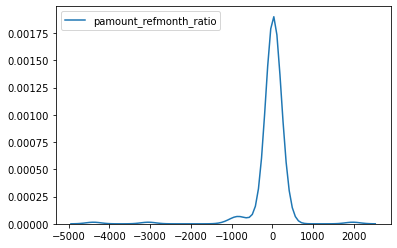

In [76]:
## Observing the distribution of pamount_refmonth_ratio
sns.kdeplot(sorted_df[sorted_df['card_id'] == 'C_ID_00007093c1']['pamount_refmonth_ratio'])

### Observation
* Distribution is quite normal.
* Should be useful in improving our results.

In [92]:
temp_df = sorted_df.groupby(['card_id']).agg({'pamount_refmonth_ratio' : ['mean','sum','var','min','max','skew']})
temp_df.columns = ['_'.join(col).strip('_') for col in temp_df.columns.values]
temp_df.head()

,pamount_refmonth_ratio_mean,pamount_refmonth_ratio_sum,pamount_refmonth_ratio_var,pamount_refmonth_ratio_min,pamount_refmonth_ratio_max,pamount_refmonth_ratio_skew
card_id,,,,,,
C_ID_00007093c1,-35.026282,-5218.915987,2.530671e+05,-4392.954224,1978.396875,-5.630927
C_ID_0001506ef0,-37.246877,-2458.293862,7.031610e+05,-6483.054375,1395.023438,-7.096555
C_ID_000183fdda,1245.784887,179393.023715,1.179007e+08,-1369.659375,129900.000000,11.796989
C_ID_00027503e2,1.911233,80.271791,1.256438e+01,0.152821,17.185128,3.767177
C_ID_0002c7c2c1,26.968172,1806.867553,2.211167e+03,0.903378,298.585736,3.868983


<a id = 'purchase_amount_diff_features'></a>
## 3. Applying numerical aggregation on the generated features

In [95]:
temp_df_2 = sorted_df.groupby(['card_id']).agg({'purch_amt_diff' : ['mean','sum','var','min','max','skew']})
temp_df_2.columns = ['_'.join(col).strip('_') for col in temp_df_2.columns.values]
temp_df_2.head()

,purch_amt_diff_mean,purch_amt_diff_sum,purch_amt_diff_var,purch_amt_diff_min,purch_amt_diff_max,purch_amt_diff_skew
card_id,,,,,,
C_ID_00007093c1,-3.334228,-496.799957,46148.039062,-1200.000000,1430.000000,0.995935
C_ID_0001506ef0,-0.287879,-19.000046,204348.109375,-1465.500000,1452.750000,0.094871
C_ID_000183fdda,-1.118056,-161.000046,224213.265625,-1850.729980,2297.000000,0.153482
C_ID_00027503e2,0.071429,3.000000,7.416437,-5.710000,5.800000,0.303621
C_ID_0002c7c2c1,-0.496866,-33.289997,5178.231445,-240.009995,249.160004,0.075289


<a id = 'sum_and_max_of_head_and_tail_of_purchase_amts'></a>
## 4. Obtaining sum,max,variance and skewness from head and tail of purchase amounts 

In [100]:
temp_df_3 = pd.DataFrame()
temp_df_3['purch_head_sum'] = sorted_df.groupby(['card_id'])['new_purchase_amount'].apply(lambda x : x.head().sum())
temp_df_3['purch_head_max'] = sorted_df.groupby(['card_id'])['new_purchase_amount'].apply(lambda x : x.head().max())
temp_df_3['purch_tail_sum'] = sorted_df.groupby(['card_id'])['new_purchase_amount'].apply(lambda x : x.tail().sum())
temp_df_3['purch_tail_max'] = sorted_df.groupby(['card_id'])['new_purchase_amount'].apply(lambda x : x.tail().max())
temp_df_3.head()

,purch_head_sum,purch_head_max,purch_tail_sum,purch_tail_max
card_id,,,,
C_ID_00007093c1,1275.199951,521.799988,571.349976,207.440002
C_ID_0001506ef0,138.979996,51.459999,1582.000000,1491.000000
C_ID_000183fdda,2112.000000,719.400024,323.829987,164.889999
C_ID_00027503e2,13.980000,4.000000,25.340000,7.340000
C_ID_0002c7c2c1,341.679993,121.379997,258.250000,109.000000


In [101]:
## Obtaining other statistical features on purchase amounts
temp_df_3['purch_head_var'] = sorted_df.groupby(['card_id'])['new_purchase_amount'].apply(lambda x : x.head().var())
temp_df_3['purch_head_skew'] = sorted_df.groupby(['card_id'])['new_purchase_amount'].apply(lambda x : x.head().skew())
temp_df_3['purch_tail_var'] = sorted_df.groupby(['card_id'])['new_purchase_amount'].apply(lambda x : x.tail().var())
temp_df_3['purch_tail_skew'] = sorted_df.groupby(['card_id'])['new_purchase_amount'].apply(lambda x : x.tail().skew())

In [102]:
temp_df_3.head()

,purch_head_sum,purch_head_max,purch_tail_sum,purch_tail_max,purch_head_var,purch_head_skew,purch_tail_var,purch_tail_skew
card_id,,,,,,,,
C_ID_00007093c1,1275.199951,521.799988,571.349976,207.440002,25530.548828,1.579385,6638.794434,0.188582
C_ID_0001506ef0,138.979996,51.459999,1582.000000,1491.000000,281.557465,0.768639,431159.156250,2.235970
C_ID_000183fdda,2112.000000,719.400024,323.829987,164.889999,74328.843750,0.559976,3183.509033,2.147732
C_ID_00027503e2,13.980000,4.000000,25.340000,7.340000,2.130030,-0.592579,7.863120,-0.597244
C_ID_0002c7c2c1,341.679993,121.379997,258.250000,109.000000,1665.964111,0.594205,1384.665161,1.126876


In [106]:
## replacing nan values by mean values as the number of missing values were too low
head_skew_mean = np.mean(temp_df_3['purch_head_skew'])
tail_skew_mean = np.mean(temp_df_3['purch_tail_skew'])

temp_df_3['purch_head_skew'].replace(np.nan,head_skew_mean,inplace=True)
temp_df_3['purch_tail_skew'].replace(np.nan,tail_skew_mean,inplace=True)
temp_df_3.isnull().sum()

purch_head_sum     0
purch_head_max     0
purch_tail_sum     0
purch_tail_max     0
purch_head_var     0
purch_head_skew    0
purch_tail_var     0
purch_tail_skew    0
dtype: int64

In [107]:
temp_df_3.head()

,purch_head_sum,purch_head_max,purch_tail_sum,purch_tail_max,purch_head_var,purch_head_skew,purch_tail_var,purch_tail_skew
card_id,,,,,,,,
C_ID_00007093c1,1275.199951,521.799988,571.349976,207.440002,25530.548828,1.579385,6638.794434,0.188582
C_ID_0001506ef0,138.979996,51.459999,1582.000000,1491.000000,281.557465,0.768639,431159.156250,2.235970
C_ID_000183fdda,2112.000000,719.400024,323.829987,164.889999,74328.843750,0.559976,3183.509033,2.147732
C_ID_00027503e2,13.980000,4.000000,25.340000,7.340000,2.130030,-0.592579,7.863120,-0.597244
C_ID_0002c7c2c1,341.679993,121.379997,258.250000,109.000000,1665.964111,0.594205,1384.665161,1.126876


<a id = 'additional_features'></a>
### Most of the stuff below is  self explanatory

In [108]:
print("Computing purchase days max...")
temp_df_3['purch_days_max'] = sorted_df.groupby(['card_id'])['purchase_date'].apply(lambda x : x.max())
print("Computing purchase days min...")
temp_df_3['purch_days_min'] = sorted_df.groupby(['card_id'])['purchase_date'].apply(lambda x : x.min())
print("Computing purchase days difference...")
temp_df_3['purch_days_diff'] = (temp_df_3['purch_days_max'] - temp_df_3['purch_days_min'])

print("Computing number of transactions...")
temp_df_3['number_of_trans'] = sorted_df.groupby(['card_id'])['purchase_date'].apply(lambda x : x.count())
temp_df_3['purch_days_avg'] = temp_df_3['purch_days_diff']/temp_df_3['number_of_trans']
temp_df_3.head()


Computing purchase days max...
Computing purchase days min...
Computing purchase days difference...
Computing number of transactions...


,purch_head_sum,purch_head_max,purch_tail_sum,purch_tail_max,purch_head_var,purch_head_skew,purch_tail_var,purch_tail_skew,purch_days_max,purch_days_min,purch_days_diff,number_of_trans,purch_days_avg
card_id,,,,,,,,,,,,,
C_ID_00007093c1,1275.199951,521.799988,571.349976,207.440002,25530.548828,1.579385,6638.794434,0.188582,2018-02-27,2017-02-14,378 days,149,2 days 12:53:09.261744
C_ID_0001506ef0,138.979996,51.459999,1582.000000,1491.000000,281.557465,0.768639,431159.156250,2.235970,2018-02-17,2017-01-14,399 days,66,6 days 01:05:27.272727
C_ID_000183fdda,2112.000000,719.400024,323.829987,164.889999,74328.843750,0.559976,3183.509033,2.147732,2018-02-25,2017-08-07,202 days,144,1 days 09:40:00
C_ID_00027503e2,13.980000,4.000000,25.340000,7.340000,2.130030,-0.592579,7.863120,-0.597244,2018-01-19,2017-05-27,237 days,42,5 days 15:25:42.857142
C_ID_0002c7c2c1,341.679993,121.379997,258.250000,109.000000,1665.964111,0.594205,1384.665161,1.126876,2018-01-25,2017-04-15,285 days,67,4 days 06:05:22.388059


In [109]:
temp_df_3['purch_days_diff'] = (temp_df_3['purch_days_max'] - temp_df_3['purch_days_min']) / np.timedelta64(1,'D')
temp_df_3['purch_days_avg'] = temp_df_3['purch_days_diff']/temp_df_3['number_of_trans']
temp_df_3.head()

,purch_head_sum,purch_head_max,purch_tail_sum,purch_tail_max,purch_head_var,purch_head_skew,purch_tail_var,purch_tail_skew,purch_days_max,purch_days_min,purch_days_diff,number_of_trans,purch_days_avg
card_id,,,,,,,,,,,,,
C_ID_00007093c1,1275.199951,521.799988,571.349976,207.440002,25530.548828,1.579385,6638.794434,0.188582,2018-02-27,2017-02-14,378.0,149,2.536913
C_ID_0001506ef0,138.979996,51.459999,1582.000000,1491.000000,281.557465,0.768639,431159.156250,2.235970,2018-02-17,2017-01-14,399.0,66,6.045455
C_ID_000183fdda,2112.000000,719.400024,323.829987,164.889999,74328.843750,0.559976,3183.509033,2.147732,2018-02-25,2017-08-07,202.0,144,1.402778
C_ID_00027503e2,13.980000,4.000000,25.340000,7.340000,2.130030,-0.592579,7.863120,-0.597244,2018-01-19,2017-05-27,237.0,42,5.642857
C_ID_0002c7c2c1,341.679993,121.379997,258.250000,109.000000,1665.964111,0.594205,1384.665161,1.126876,2018-01-25,2017-04-15,285.0,67,4.253731


In [110]:
temp_df = pd.merge(temp_df,temp_df_2,on='card_id',how='inner')
temp_df = pd.merge(temp_df,temp_df_3,on='card_id',how='inner')
temp_df.isnull().sum()

pamount_refmonth_ratio_mean     0
pamount_refmonth_ratio_sum      0
pamount_refmonth_ratio_var      0
pamount_refmonth_ratio_min      0
pamount_refmonth_ratio_max      0
pamount_refmonth_ratio_skew    34
purch_amt_diff_mean             0
purch_amt_diff_sum              0
purch_amt_diff_var              0
purch_amt_diff_min              0
purch_amt_diff_max              0
purch_amt_diff_skew            34
purch_head_sum                  0
purch_head_max                  0
purch_tail_sum                  0
purch_tail_max                  0
purch_head_var                  0
purch_head_skew                 0
purch_tail_var                  0
purch_tail_skew                 0
purch_days_max                  0
purch_days_min                  0
purch_days_diff                 0
number_of_trans                 0
purch_days_avg                  0
dtype: int64

In [111]:
temp_df.shape

(201917, 25)

In [112]:
temp_df['purchase_amount_sum'] = sorted_df.groupby(['card_id'])['new_purchase_amount'].apply(lambda x : x.sum())
temp_df['avg_spend_per_trans'] = temp_df['purchase_amount_sum']/temp_df['number_of_trans']
temp_df.shape

(201917, 27)

In [113]:
temp_df.isnull().sum()

pamount_refmonth_ratio_mean     0
pamount_refmonth_ratio_sum      0
pamount_refmonth_ratio_var      0
pamount_refmonth_ratio_min      0
pamount_refmonth_ratio_max      0
pamount_refmonth_ratio_skew    34
purch_amt_diff_mean             0
purch_amt_diff_sum              0
purch_amt_diff_var              0
purch_amt_diff_min              0
purch_amt_diff_max              0
purch_amt_diff_skew            34
purch_head_sum                  0
purch_head_max                  0
purch_tail_sum                  0
purch_tail_max                  0
purch_head_var                  0
purch_head_skew                 0
purch_tail_var                  0
purch_tail_skew                 0
purch_days_max                  0
purch_days_min                  0
purch_days_diff                 0
number_of_trans                 0
purch_days_avg                  0
purchase_amount_sum             0
avg_spend_per_trans             0
dtype: int64

In [114]:
ratio_skew_mean = np.mean(temp_df['pamount_refmonth_ratio_skew'])
diff_skew_mean = np.mean(temp_df['purch_amt_diff_skew'])

In [115]:
## replacing nan values by mean values
temp_df['pamount_refmonth_ratio_skew'].replace(np.nan,ratio_skew_mean,inplace=True)
temp_df['purch_amt_diff_skew'].replace(np.nan,diff_skew_mean,inplace=True)